## Import data and libraries

In [499]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from scipy.stats import linregress
# from matplotlib.ticker import MaxNLocator
# from scipy.ndimage import gaussian_filter
# from scipy.interpolate import interp1d
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style("whitegrid")

In [277]:
# import data
df_insta = pd.read_csv('../data/processed/Cleaned-Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')
df_lnkd = pd.read_csv('../data/processed/Cleaned-Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Linkedin.csv')
df_twit = pd.read_csv('../data/processed/Cleaned-Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv')
df_fbk = pd.read_csv('../data/processed/Cleaned-Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv')

## Helper functions

In [278]:
def deal_missing_values(*dataframes):
    """
    Fills missing values with 0 for numeric columns 
    and 'none' for categorical columns
    Parameters:
        *dataframes (pandas.DataFrame): Variable number of pandas 

    Returns:
        None
    """
    for i, df in enumerate(dataframes, 1):
        numeric_cols = df.select_dtypes(include=['float64']).columns
        string_cols = df.select_dtypes(include=['object']).columns
        df[numeric_cols] = df[numeric_cols].fillna(0)
        df[string_cols] = df[string_cols].fillna('none')
    

In [279]:
def transform_data(df):
    """
    Extracts parts from a 'date' column 
    in each DataFrame and adds them as new columns.

    Parameters:
        df: a pandas dataframe.

    Returns:
        None
    """
    
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day_name()
    df['month'] = df['date'].dt.month_name()
    df['year'] = df['date'].dt.year
    df['time_of_day'] = df['date'].dt.time
    df['post_length'] = df['post'].apply(lambda x: len(x))

## Exploring the data

In [280]:
# copy the data to retain original
df_insta_1 = df_insta.copy()
df_lnkd_1 = df_lnkd.copy()
df_twit_1 = df_twit.copy()
df_fbk_1 = df_fbk.copy()

In [281]:
# subset only relevant columns
subset = ['date', 'post_id', 'network', 'post_type',\
'content_type', 'profile','sent_by', 'link',\
'post','impressions','organic_impressions','viral_impressions',\
'reach','organic_reach', 'potential_reach','engagement_rate_per_impression',\
'engagement_rate_per_reach','engagements', 'reactions',\
'likes','dislikes','shares','saves', 'click_through_rate','comments',\
'video_views','organic_video_views', 'tags']


### Instagram

In [282]:
deal_missing_values(df_insta_1)

In [283]:
df_insta_1.shape

(10000, 147)

In [284]:
df_insta_1 = df_insta_1.loc[:, subset]

In [285]:
df_insta_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            10000 non-null  object 
 1   post_id                         10000 non-null  int64  
 2   network                         10000 non-null  object 
 3   post_type                       10000 non-null  object 
 4   content_type                    10000 non-null  object 
 5   profile                         10000 non-null  object 
 6   sent_by                         10000 non-null  object 
 7   link                            10000 non-null  object 
 8   post                            10000 non-null  object 
 9   impressions                     10000 non-null  float64
 10  organic_impressions             10000 non-null  float64
 11  viral_impressions               10000 non-null  float64
 12  reach                           1

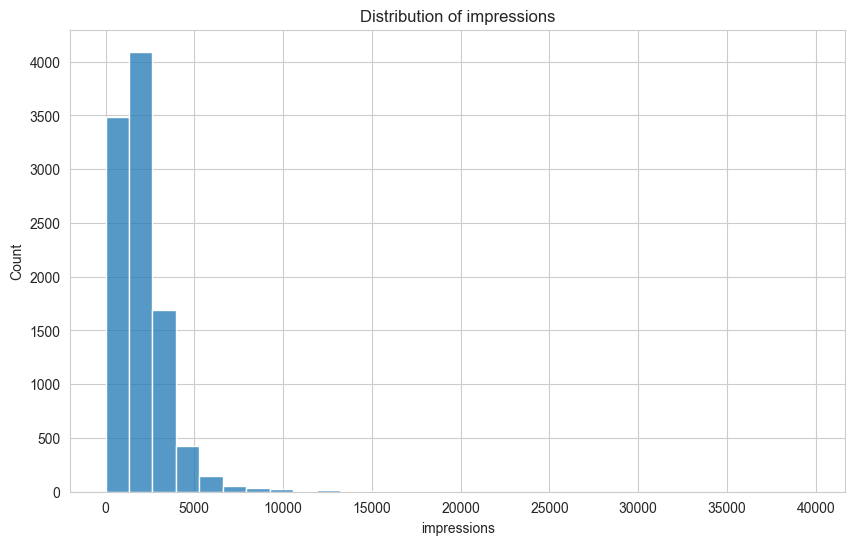

In [286]:
# impressions
sns.histplot(df_insta_1.impressions, bins=30);
plt.title('Distribution of impressions');

In [287]:
df_insta_1['impressions'].describe()

count    10000.000000
mean      1936.415100
std       1799.889458
min          0.000000
25%        963.000000
50%       1757.500000
75%       2615.250000
max      39681.000000
Name: impressions, dtype: float64

Taking a look a the histogram and the desriptive statistics, it can be seen that 75% of this profile's instagram posts have impressions less than 2700, any higher numbers are outliers. In this case outliers are not treated as an aberraion or data entry error, rather they shoul be viwed as part of this data and help,  paint an accurate picture of the impressions data. What this means is on average an instagram post by this profile garners about 1900 impressions and some posts though few in number have no impressions at all. Organic and viral impressions also exist, and for this profile all impresions appear to be organic.

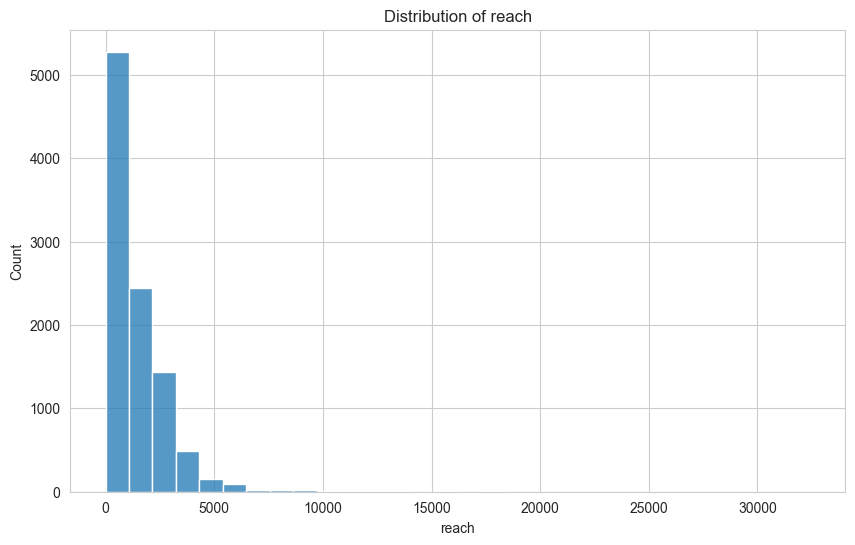

In [288]:
# reach
sns.histplot(df_insta_1.reach, bins=30);
plt.title('Distribution of reach');

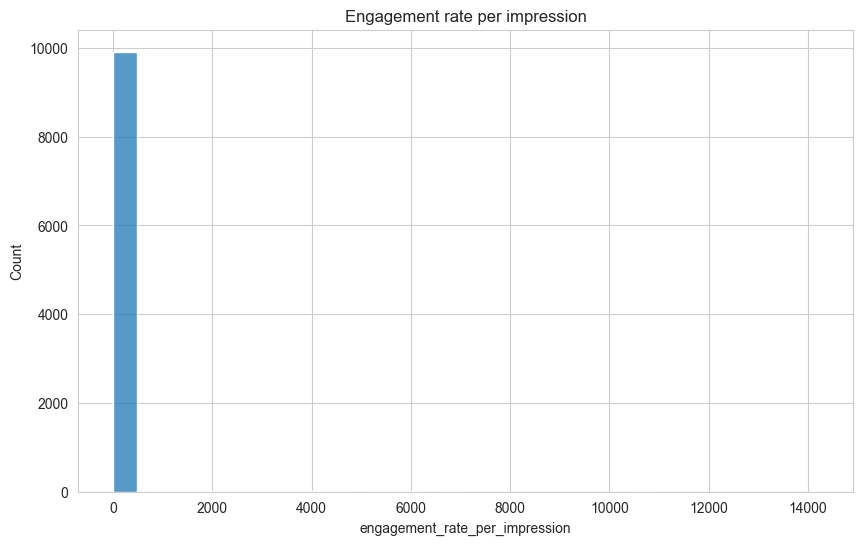

In [289]:
# engagement_rate_per_impression
sns.histplot(df_insta_1.engagement_rate_per_impression, bins=30);
plt.title('Engagement rate per impression');

Histogram calls for a little more investigation

In [290]:
df_insta_1.loc[df_insta_1['engagements'] > df_insta_1['impressions']]

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views,tags
3363,2022-05-28 20:04:00,17952372655763047,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/CeHOEd3IkeR/,"Reposted from @iam_youngxt1 \nMy son's entry, ...",1770.0,1770.0,0.0,1664.0,1664.0,0.0,267.29,284.31,4731.0,4729.0,4729.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,none
4221,2022-05-30 07:19:00,17948127673858865,Instagram,Post,Video,stanbicibtc,admin,https://www.instagram.com/p/CeLABMjI7f0/,Reposted from @praisenicole02 \n@stanbicibtc #...,1420.0,1420.0,0.0,1286.0,1286.0,0.0,113.52,125.35,1612.0,1602.0,1602.0,0.0,0.0,1.0,0.0,0.0,511.0,511.0,none
4474,2022-05-29 15:59:00,17925426512366126,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/CeJWxaUIJeU/,Reposted from @slimy.slipy \nHere's our entry ...,1252.0,1252.0,0.0,1184.0,1184.0,0.0,329.23,348.14,4122.0,4121.0,4121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
5211,2022-05-26 21:33:00,17940616240950639,Instagram,Post,Video,stanbicibtc,admin,https://www.instagram.com/p/CeCOhSsoFUL/,Repost by @sambo.bright\n———\nMy name is preci...,960.0,960.0,0.0,852.0,852.0,0.0,426.98,481.10,4099.0,4096.0,4096.0,0.0,0.0,2.0,0.0,0.0,286.0,286.0,none
5333,2022-05-28 14:12:00,17930468435333171,Instagram,Post,Video,stanbicibtc,admin,https://www.instagram.com/p/CeGli6FoKzs/,Reposted from @eberecchuqs \nThank you you so ...,895.0,895.0,0.0,783.0,783.0,0.0,162.23,185.44,1452.0,1304.0,1304.0,0.0,0.0,1.0,0.0,0.0,3481.0,3481.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,2020-08-11 12:34:00,17878075045774772,Instagram,Post,Carousel,stanbicibtc,admin,https://www.instagram.com/p/CDv12rJpxRr/,Stanbic IBTC Bank rebuts the Ascon Oil story. ...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,9.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,none
7270,2020-06-23 13:00:00,17941470292369344,Instagram,Post,Photo,stanbicibtc,Aramide Salami,https://www.instagram.com/p/CBxt1Tgljdp/,Let’s help you get the right assessment in tun...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,18.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
7271,2019-11-28 17:37:00,18095219674129670,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/B5aoQH_Fcbl/,👋 if you ever used this.\n#ThrowbackThursday #TBT,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,7.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
7288,2019-06-24 11:00:00,18074207209066579,Instagram,Post,Photo,stanbicibtc,Aramide Salami,https://www.instagram.com/p/BzFp8h2giKk/,"With consistency and focus, the early mornings...",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none


In [291]:
df_insta_1 = df_insta_1.drop(df_insta_1[df_insta_1['engagements'] > df_insta_1['impressions']].index)

In [292]:
df_insta_1['engagement_rate_per_impression'].describe()

count    9879.000000
mean        2.909510
std         3.951427
min         0.000000
25%         1.830000
50%         2.700000
75%         3.670000
max        91.610000
Name: engagement_rate_per_impression, dtype: float64

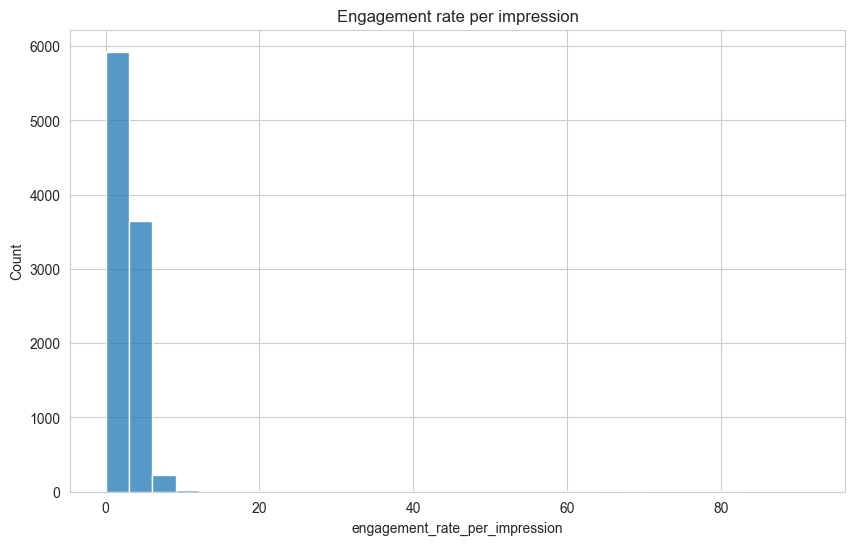

In [293]:
sns.histplot(df_insta_1.engagement_rate_per_impression, bins=30);
plt.title('Engagement rate per impression');

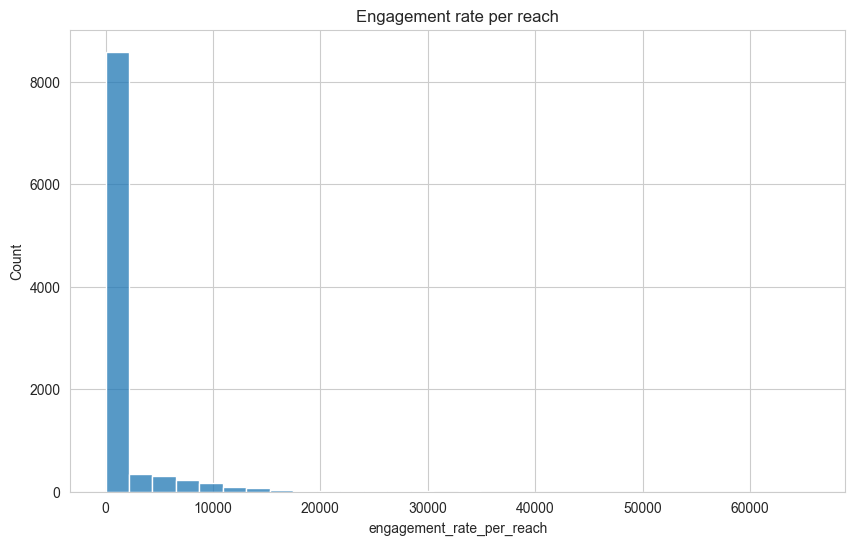

In [294]:
# engagement_rate_per_reach
sns.histplot(df_insta_1.engagement_rate_per_reach, bins=30);
plt.title('Engagement rate per reach');

In [295]:
df_insta_1.loc[(df_insta_1['engagements'] > df_insta_1['reach'])]

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views,tags
5172,2022-05-27 14:13:00,17923391309260353,Instagram,Post,Video,stanbicibtc,admin,https://www.instagram.com/p/CeEA_14oU-j/,Reposted from @queenminna1_ \nThanks so much @...,1001.0,1001.0,0.0,878.0,878.0,0.0,91.61,104.44,917.0,917.0,917.0,0.0,0.0,0.0,0.0,0.0,4668.0,4668.0,none
5608,2022-05-27 13:14:00,17960770855732741,Instagram,Post,Video,stanbicibtc,admin,https://www.instagram.com/p/CeD6RMaIGJb/,#Repost @smartlouis_david \n• • • • • •\nI am ...,2926.0,2926.0,0.0,540.0,540.0,0.0,21.84,118.33,639.0,637.0,637.0,0.0,0.0,0.0,0.0,0.0,4460.0,4460.0,none
5773,2018-09-08 11:00:00,17935644973194967,Instagram,Post,Photo,stanbicibtc,Aramide Salami,https://www.instagram.com/p/BndgNu_l6i9/,Literacy is a bridge from misery to hope. - Ko...,2826.0,2826.0,0.0,38.0,38.0,0.0,4.03,300.00,114.0,109.0,109.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,none
5776,2019-02-01 09:56:00,17967556690203946,Instagram,Post,Carousel,stanbicibtc,admin,https://www.instagram.com/p/BtVU9lkhfnm/,The stage is set and we can't wait to have you...,5073.0,5073.0,0.0,30.0,30.0,0.0,6.72,1137.00,341.0,321.0,321.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,none
5779,2019-01-15 09:00:00,17914738618279556,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/BspdBmFFLF7/,"As we remember our uniformed men and women, we...",1593.0,1593.0,0.0,29.0,29.0,0.0,2.76,151.72,44.0,44.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,2017-01-25 10:43:00,17870183068056204,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/BPrsgAfhDv8/,#CareerTip – Always create a good first impres...,1379.0,1379.0,0.0,0.0,0.0,0.0,3.19,0.00,44.0,43.0,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,none
8188,2017-01-24 17:44:00,17870599396017012,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/BPp35KeBSU-/,You don't have to worry about your child's sch...,1178.0,1178.0,0.0,0.0,0.0,0.0,4.50,0.00,53.0,53.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
8189,2017-01-24 11:07:00,17871251542057445,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/BPpKcEXBa3b/,It's not how many times you fall down that mat...,1249.0,1249.0,0.0,0.0,0.0,0.0,4.00,0.00,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
8190,2017-01-23 17:25:00,17859526477099951,Instagram,Post,Photo,stanbicibtc,admin,https://www.instagram.com/p/BPnQ89ZBs8r/,Our Mutual Funds are a great way to grow your ...,1460.0,1460.0,0.0,0.0,0.0,0.0,3.29,0.00,48.0,46.0,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,none


In [296]:
df_insta_1 = df_insta_1.drop(df_insta_1[df_insta_1['engagements'] > df_insta_1['reach']].index)

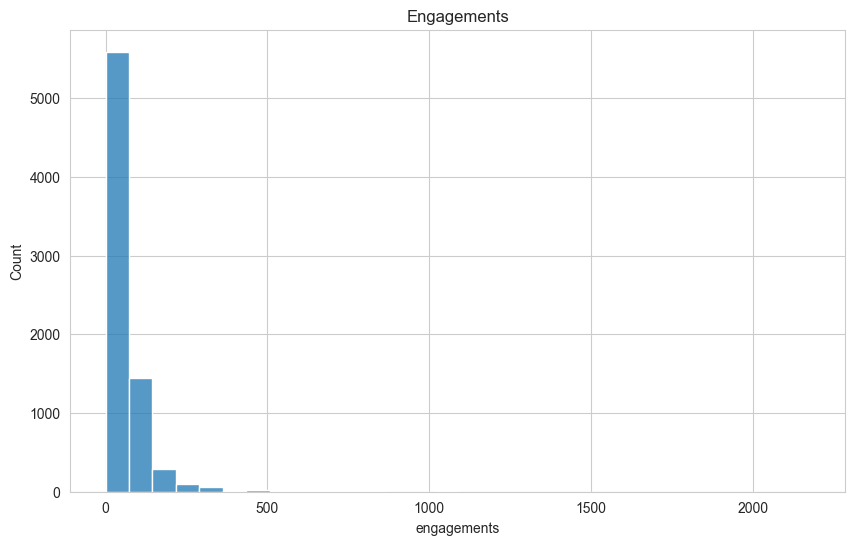

In [297]:
# engagements
sns.histplot(df_insta_1.engagements, bins=30);
plt.title('Engagements');

In [298]:
df_insta_1['engagements'].describe()

count    7569.000000
mean       59.275201
std        96.329390
min         0.000000
25%        10.000000
50%        40.000000
75%        75.000000
max      2176.000000
Name: engagements, dtype: float64

In [299]:
# obtain descriptive statistics for numeric columns
numeric_cols = df_insta_1.select_dtypes(include=['float64']).columns
string_cols = df_insta_1.select_dtypes(include=['object']).columns

df_insta_1[numeric_cols].describe()

,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views
count,7569.000000,7569.000000,7569.0,7569.000000,7569.000000,7569.0,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.0,7569.0,7569.000000,7569.0,7569.000000,7569.000000,7569.000000
mean,1882.527282,1882.527282,0.0,1688.356850,1688.356850,0.0,2.497089,2.757121,59.275201,49.137006,49.137006,0.0,0.0,1.674726,0.0,7.410622,81.554499,81.554499
std,1973.494351,1973.494351,0.0,1792.816024,1792.816024,0.0,4.241395,4.710226,96.329390,79.157949,79.157949,0.0,0.0,8.621284,0.0,26.254748,460.303222,460.303222
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,542.000000,542.000000,0.0,280.000000,280.000000,0.0,1.380000,1.370000,10.000000,8.000000,8.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,1634.000000,1634.000000,0.0,1474.000000,1474.000000,0.0,2.350000,2.540000,40.000000,32.000000,32.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000
75%,2640.000000,2640.000000,0.0,2373.000000,2373.000000,0.0,3.080000,3.390000,75.000000,64.000000,64.000000,0.0,0.0,2.000000,0.0,7.000000,0.000000,0.000000
max,39681.000000,39681.000000,0.0,32418.000000,32418.000000,0.0,87.100000,91.180000,2176.000000,2136.000000,2136.000000,0.0,0.0,625.000000,0.0,1033.000000,13581.000000,13581.000000


#### Relationship between numeric features

Columns like;  'viral_impressions', 'dislikes', 'shares' are removed before constructing the matrix as they contain no values greater than zero.

In [300]:
insta_corr = df_insta_1[numeric_cols].drop(['viral_impressions', 'dislikes', 'shares', 'potential_reach', 'click_through_rate'], axis = 1).corr()

In [301]:
insta_corr

,impressions,organic_impressions,reach,organic_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,saves,comments,video_views,organic_video_views
impressions,1.000000,1.000000,0.993273,0.993273,0.151674,0.156579,0.728523,0.679762,0.679762,0.417202,0.502296,0.360963,0.360963
organic_impressions,1.000000,1.000000,0.993273,0.993273,0.151674,0.156579,0.728523,0.679762,0.679762,0.417202,0.502296,0.360963,0.360963
reach,0.993273,0.993273,1.000000,1.000000,0.144766,0.150716,0.714266,0.669323,0.669323,0.387382,0.490782,0.369896,0.369896
organic_reach,0.993273,0.993273,1.000000,1.000000,0.144766,0.150716,0.714266,0.669323,0.669323,0.387382,0.490782,0.369896,0.369896
engagement_rate_per_impression,0.151674,0.151674,0.144766,0.144766,1.000000,0.991118,0.576184,0.626206,0.626206,0.049153,0.150744,0.129437,0.129437
engagement_rate_per_reach,0.156579,0.156579,0.150716,0.150716,0.991118,1.000000,0.586203,0.634817,0.634817,0.054496,0.158756,0.131409,0.131409
engagements,0.728523,0.728523,0.714266,0.714266,0.576184,0.586203,1.000000,0.963743,0.963743,0.405650,0.614568,0.324160,0.324160
reactions,0.679762,0.679762,0.669323,0.669323,0.626206,0.634817,0.963743,1.000000,1.000000,0.327402,0.400817,0.349274,0.349274
likes,0.679762,0.679762,0.669323,0.669323,0.626206,0.634817,0.963743,1.000000,1.000000,0.327402,0.400817,0.349274,0.349274
saves,0.417202,0.417202,0.387382,0.387382,0.049153,0.054496,0.405650,0.327402,0.327402,1.000000,0.175799,0.075487,0.075487


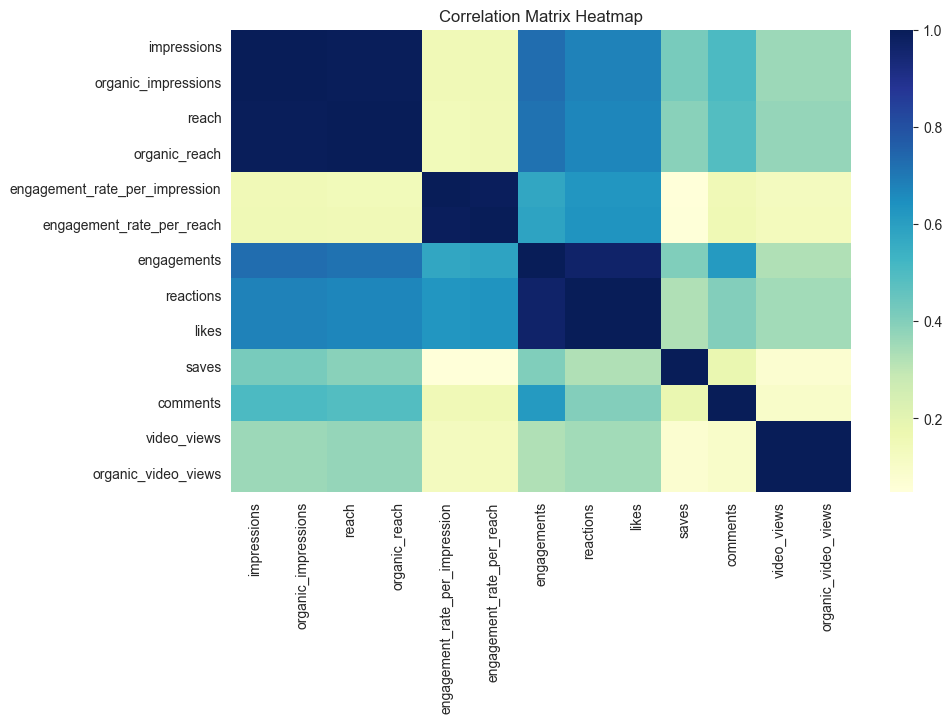

In [302]:
sns.heatmap(insta_corr, cmap="YlGnBu");
plt.title("Correlation Matrix Heatmap");

The above correlation heatmap shows t

#### Categorical Features

In [303]:
df_insta_1[string_cols].head()

,date,network,post_type,content_type,profile,sent_by,link,post,tags
0,2023-01-30 17:06:00,Instagram,Post,Carousel,stanbicibtc,admin,https://www.instagram.com/p/CoC6CKBIHbV/,The new Naira banknotes in circulation have se...,none
1,2022-04-15 09:04:00,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CcXUQTEMRm7/,We hope the faith that this #GoodFriday restor...,none
2,2021-05-28 20:45:00,Instagram,Post,Video,stanbicibtc,admin,https://www.instagram.com/p/CPbcdjygiaK/,Reposted from @mzdosunmu My son's entry\n#ITCA...,none
3,2023-01-04 16:08:00,Instagram,Post,Carousel,stanbicibtc,admin,https://www.instagram.com/p/Cm_2oino-Me/,The new Naira banknotes in circulation have se...,none
4,2021-12-07 18:52:00,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CXMNAKFsjSs/,"If you were born in June, ‘cut soap for us oh’...",none


In [304]:
# most common content_type
df_insta_1.content_type.value_counts()

content_type
Photo       6267
Video        836
Carousel     466
Name: count, dtype: int64

### Twitter

In [305]:
deal_missing_values(df_twit_1)

In [306]:
df_twit_1 = df_twit_1.loc[:, subset]

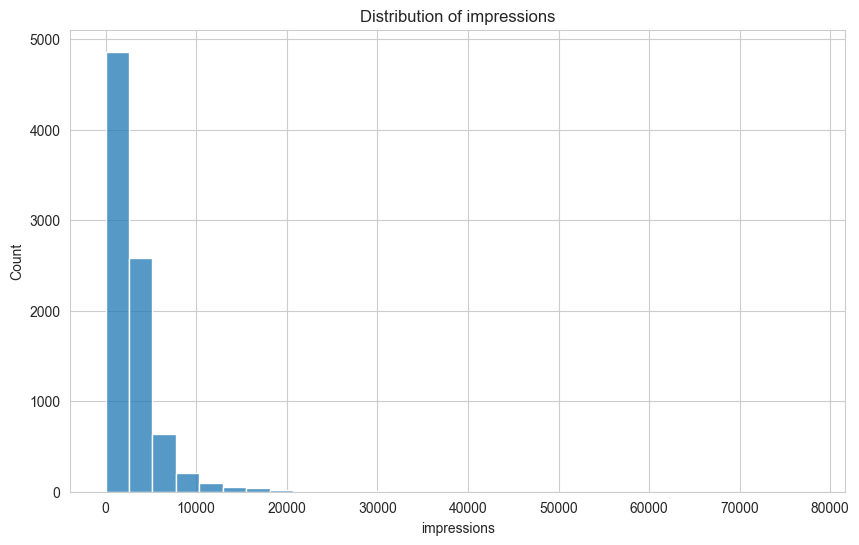

In [307]:
# impressions
sns.histplot(df_twit_1.impressions, bins=30);
plt.title('Distribution of impressions');

In [308]:
df_twit_1.impressions.describe()

count     8529.000000
mean      2931.832688
std       3315.641702
min          0.000000
25%       1134.000000
50%       2214.000000
75%       3661.000000
max      77765.000000
Name: impressions, dtype: float64

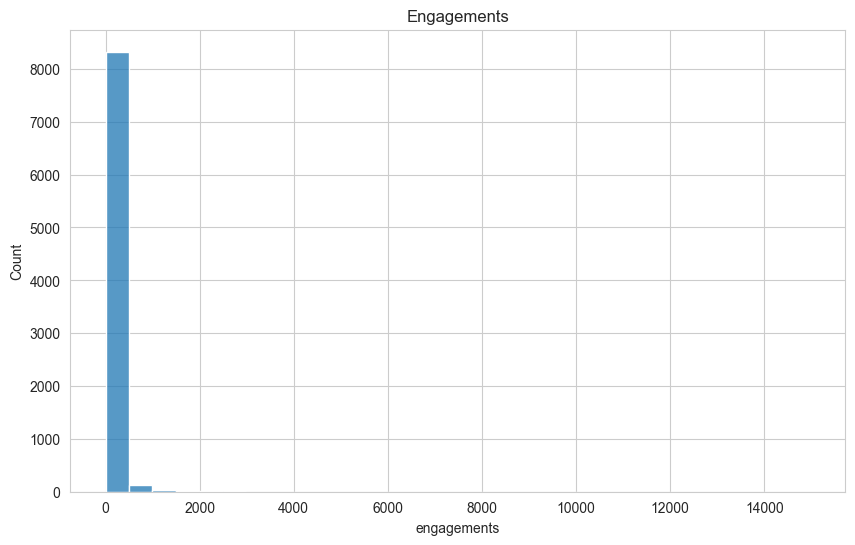

In [309]:
# engagements
sns.histplot(df_twit_1.engagements, bins=30);
plt.title('Engagements');

In [310]:
df_twit_1.engagements.describe()

count     8529.000000
mean       101.207410
std        294.447391
min          0.000000
25%         22.000000
50%         51.000000
75%        102.000000
max      14972.000000
Name: engagements, dtype: float64

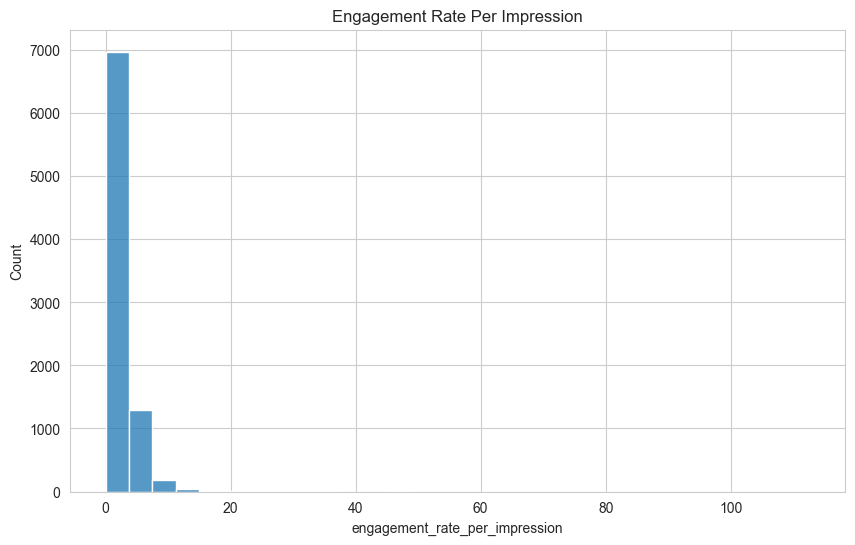

In [311]:
# engagement rate per impression
sns.histplot(df_twit_1.engagement_rate_per_impression, bins=30);
plt.title('Engagement Rate Per Impression');

In [312]:
df_twit_1.engagement_rate_per_impression.describe()

count    8529.000000
mean        2.675369
std         2.863921
min         0.000000
25%         1.450000
50%         2.260000
75%         3.290000
max       112.680000
Name: engagement_rate_per_impression, dtype: float64

#### Relationships between numeric features

In [313]:
# correlation between numeric features
twit_corr = df_twit_1[numeric_cols].drop(['engagement_rate_per_reach','organic_video_views','saves','organic_reach','reach','viral_impressions', 'dislikes', 'shares'], axis = 1).corr()

In [314]:
twit_corr

,impressions,organic_impressions,potential_reach,engagement_rate_per_impression,engagements,reactions,likes,click_through_rate,comments,video_views
impressions,1.000000,1.000000,0.307556,0.239799,0.620083,0.158679,0.158679,-0.029668,0.609197,0.209897
organic_impressions,1.000000,1.000000,0.307556,0.239799,0.620083,0.158679,0.158679,-0.029668,0.609197,0.209897
potential_reach,0.307556,0.307556,1.000000,0.220681,0.268379,0.160061,0.160061,0.040222,0.141997,0.185944
engagement_rate_per_impression,0.239799,0.239799,0.220681,1.000000,0.623517,0.589660,0.589660,0.223888,0.269068,0.093043
engagements,0.620083,0.620083,0.268379,0.623517,1.000000,0.685006,0.685006,0.056447,0.511319,0.101835
reactions,0.158679,0.158679,0.160061,0.589660,0.685006,1.000000,1.000000,0.023314,0.179588,0.046616
likes,0.158679,0.158679,0.160061,0.589660,0.685006,1.000000,1.000000,0.023314,0.179588,0.046616
click_through_rate,-0.029668,-0.029668,0.040222,0.223888,0.056447,0.023314,0.023314,1.000000,0.019426,-0.017766
comments,0.609197,0.609197,0.141997,0.269068,0.511319,0.179588,0.179588,0.019426,1.000000,0.091061
video_views,0.209897,0.209897,0.185944,0.093043,0.101835,0.046616,0.046616,-0.017766,0.091061,1.000000


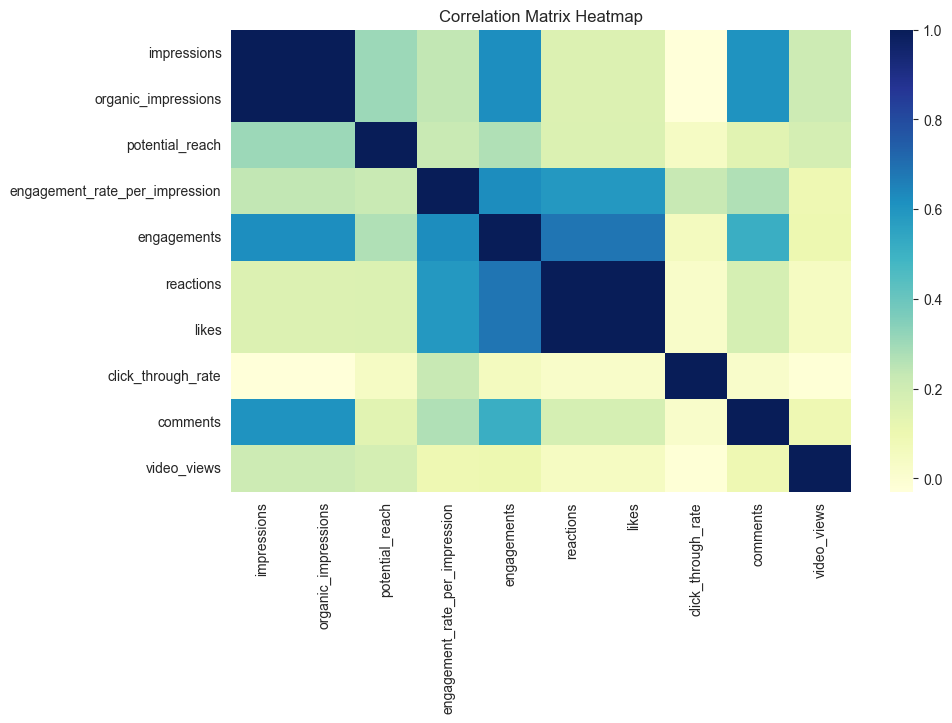

In [315]:
sns.heatmap(twit_corr, cmap="YlGnBu");
plt.title("Correlation Matrix Heatmap");

In [316]:
# categorical variables
df_twit_1.content_type.value_counts()

content_type
Photo    6213
Text     1018
Video     883
Link      415
Name: count, dtype: int64

### Facebook

In [317]:
deal_missing_values(df_fbk_1)

In [318]:
df_fbk_1 = df_fbk_1.loc[:, subset]

In [319]:
df_fbk_1.head()

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views,tags
0,2022-12-17 17:08:00,253788558082460_5441020446025886,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",207378.0,207378.0,5.0,207378.0,207378.0,0.0,0.49,0.49,1024.0,179.0,176.0,0.0,2.0,0.0,0.0,59.0,982.0,982.0,CIB Posts
1,2019-05-04 10:01:00,253788558082460_2001824979945467,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,125784.0,125784.0,23926.0,92009.0,92009.0,0.0,4.67,6.39,5876.0,762.0,747.0,0.0,47.0,0.0,0.0,572.0,0.0,0.0,none
2,2020-06-02 21:00:00,253788558082460_2768996106561680,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,89699.0,89699.0,9319.0,84347.0,84347.0,0.0,5.29,5.62,4744.0,465.0,458.0,0.0,29.0,0.0,0.0,855.0,0.0,0.0,none
3,2022-05-09 10:37:00,253788558082460_4808157902645480,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,79118.0,79118.0,170.0,78407.0,78407.0,0.0,0.56,0.57,445.0,102.0,101.0,0.0,2.0,0.0,0.0,11.0,0.0,0.0,none
4,2021-07-18 10:00:00,253788558082460_3890983261029620,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",76759.0,76759.0,20443.0,74035.0,74035.0,0.0,6.16,6.39,4730.0,413.0,383.0,0.0,10.0,0.0,0.0,869.0,0.0,0.0,none


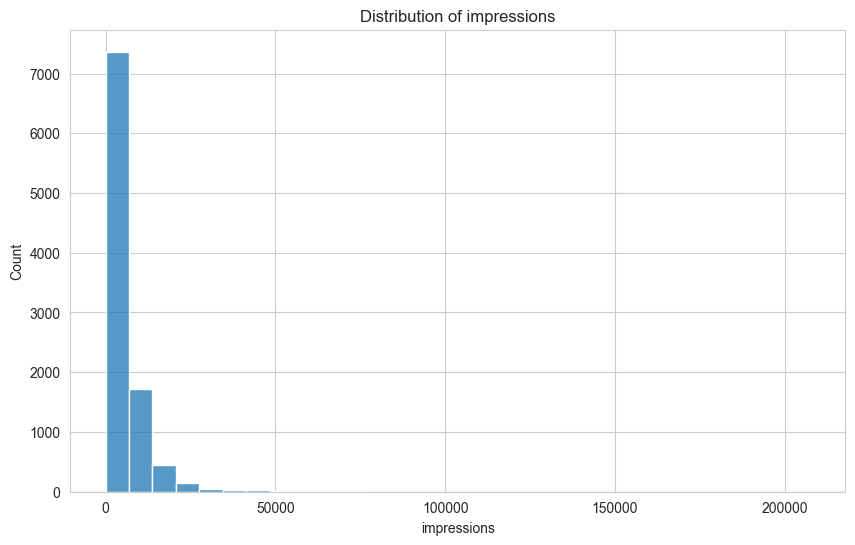

In [320]:
# impressions
sns.histplot(df_fbk_1.impressions, bins=30);
plt.title('Distribution of impressions');

In [321]:
df_fbk_1.impressions.describe()

count      9803.000000
mean       5313.960012
std        7153.448709
min           0.000000
25%        1205.000000
50%        3692.000000
75%        6885.500000
max      207378.000000
Name: impressions, dtype: float64

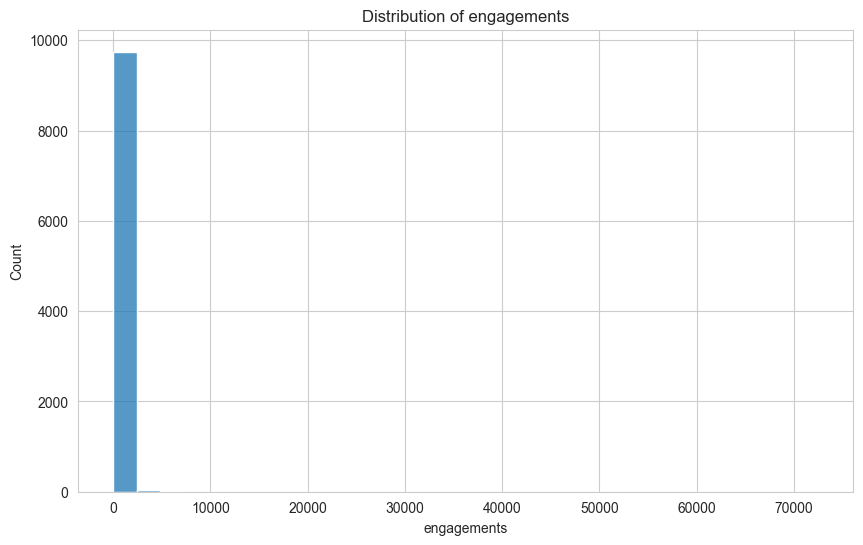

In [322]:
# engagements
sns.histplot(df_fbk_1.engagements, bins=30);
plt.title('Distribution of engagements');

In [323]:
df_fbk_1.engagements.describe()

count     9803.000000
mean       210.176375
std       1057.352925
min          0.000000
25%         45.000000
50%         93.000000
75%        201.000000
max      72474.000000
Name: engagements, dtype: float64

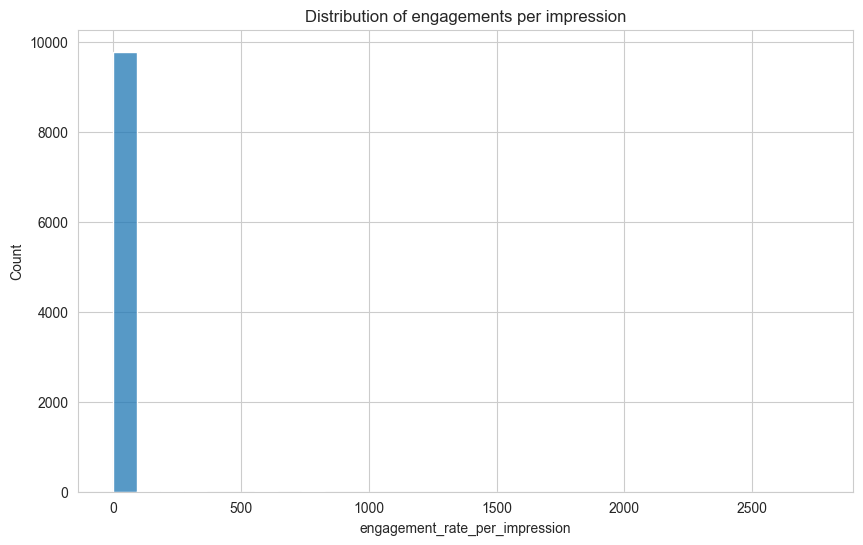

In [324]:
# engagement rate per impression
sns.histplot(df_fbk_1.engagement_rate_per_impression, bins=30);
plt.title('Distribution of engagements per impression');

In [325]:
df_fbk_1.loc[(df_fbk_1['engagements'] > df_fbk_1['reach'])]

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views,tags
4438,2022-10-12 14:09:00,253788558082460_635714361618923,Facebook,Post,Video,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/videos/63...,"Reward4Saving Live Draw - September\n\nToday, ...",4057.0,4057.0,500.0,3776.0,3776.0,0.0,149.99,161.15,6085.0,960.0,559.0,0.0,9.0,0.0,0.0,935.0,2174.0,2174.0,none
6589,2022-08-08 14:04:00,253788558082460_522769012983997,Facebook,Post,Video,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/videos/52...,Reward4Saving July Live Draws\n\n70 people wil...,1984.0,1984.0,151.0,1961.0,1961.0,0.0,156.60,158.44,3107.0,292.0,224.0,0.0,1.0,0.0,0.0,411.0,1098.0,1098.0,"CHNW Mass Retail, Reward4Saving"
7680,2023-04-12 10:30:00,253788558082460_5788456474615613,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,The #Reward4Saving promo for March is going do...,95.0,95.0,0.0,93.0,93.0,0.0,112.63,115.05,107.0,82.0,79.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,"CHNW Mass Retail, Reward4Saving"
7681,2017-07-25 15:50:00,253788558082460_1234840493310590,Facebook,Post,Video,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/videos/12...,none,110.0,78.0,32.0,87.0,62.0,0.0,767.27,970.11,844.0,8.0,8.0,0.0,1.0,0.0,0.0,1.0,789.0,789.0,none
7682,2023-04-11 18:51:00,253788558082460_5786622688132325,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Get ready to be rewarded! 🕺🏾💃🏾\nJoin us tomorr...,76.0,76.0,0.0,74.0,74.0,0.0,160.53,164.86,122.0,84.0,84.0,0.0,3.0,0.0,0.0,35.0,0.0,0.0,"CHNW Mass Retail, Reward4Saving"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886,2015-06-10 10:05:00,253788558082460_692797937514851,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/posts/692...,Interview tip: Answering the question ‘What mo...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,56.0,36.0,36.0,0.0,6.0,0.0,0.0,14.0,0.0,0.0,none
8887,2015-06-02 10:00:00,253788558082460_688883431239635,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,Visit www.stanbicibtcpension.com to talk to ou...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,333.0,23.0,23.0,0.0,4.0,0.0,0.0,306.0,0.0,0.0,none
8890,2014-07-24 10:15:00,253788558082460_531988823595764,Facebook,Post,Link,Stanbic IBTC,admin,https://facebook.com/253788558082460_531988823...,Do you know any federal government employee pl...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,24.0,10.0,10.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,none
8891,2013-11-29 19:15:00,253788558082460_419289788199002,Facebook,Post,Text,Stanbic IBTC,admin,https://www.facebook.com/253788558082460/posts...,Our mall and market branches are open for you ...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,138.0,54.0,54.0,0.0,4.0,0.0,0.0,80.0,0.0,0.0,none


In [326]:
df_fbk_1 = df_fbk_1.drop(df_fbk_1[df_fbk_1['engagements'] > df_fbk_1['reach']].index)

In [327]:
df_fbk_1.engagement_rate_per_impression.describe()

count    8627.000000
mean        2.900105
std         3.511885
min         0.000000
25%         1.575000
50%         2.370000
75%         3.505000
max        86.110000
Name: engagement_rate_per_impression, dtype: float64

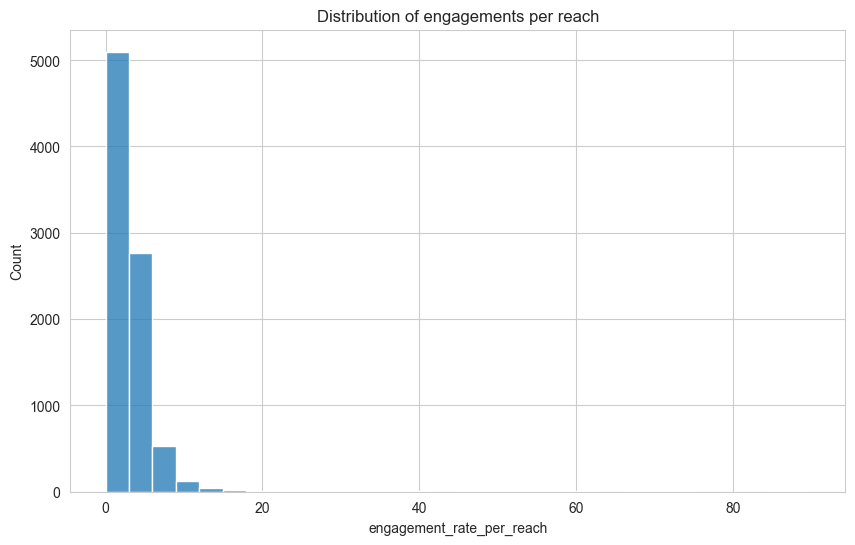

In [328]:
# enagegment rate per reach
sns.histplot(df_fbk_1.engagement_rate_per_reach, bins=30);
plt.title('Distribution of engagements per reach');

In [329]:
df_fbk_1.engagement_rate_per_reach.describe()

count    8627.000000
mean        3.217704
std         3.777500
min         0.000000
25%         1.690000
50%         2.600000
75%         4.010000
max        89.860000
Name: engagement_rate_per_reach, dtype: float64

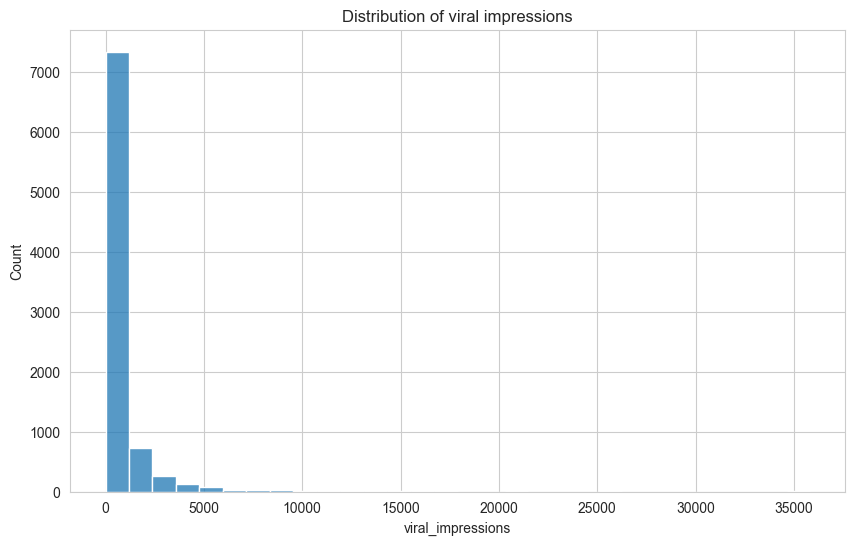

In [330]:
# viral impressions
sns.histplot(df_fbk_1.viral_impressions, bins=30);
plt.title('Distribution of viral impressions');

In [331]:
df_fbk_1.viral_impressions.describe()

count     8627.000000
mean       642.288165
std       1672.292739
min          0.000000
25%          7.000000
50%        100.000000
75%        574.500000
max      35816.000000
Name: viral_impressions, dtype: float64

#### Relationships between numeric features

In [332]:
# correlation between numeric features
fbk_corr = df_fbk_1[numeric_cols].drop(['saves','potential_reach', 'dislikes'], axis = 1).corr()

In [333]:
fbk_corr

,impressions,organic_impressions,viral_impressions,reach,organic_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,shares,click_through_rate,comments,video_views,organic_video_views
impressions,1.000000,0.994943,0.651941,0.979757,0.972042,0.100543,0.129357,0.787281,0.587946,0.597920,0.472495,-0.011635,0.639861,-0.006393,-0.006798
organic_impressions,0.994943,1.000000,0.620978,0.983881,0.982275,0.100030,0.124375,0.779334,0.582361,0.591718,0.451472,-0.011873,0.622651,-0.005781,-0.006187
viral_impressions,0.651941,0.620978,1.000000,0.543459,0.521371,0.089748,0.161153,0.642527,0.469887,0.483608,0.801432,-0.018213,0.515728,0.042932,0.042668
reach,0.979757,0.983881,0.543459,1.000000,0.998128,0.108692,0.117318,0.772411,0.580410,0.588221,0.386086,-0.000234,0.621500,0.002927,0.002534
organic_reach,0.972042,0.982275,0.521371,0.998128,1.000000,0.107907,0.113476,0.764094,0.574184,0.581560,0.370433,-0.000206,0.608759,0.003254,0.002863
engagement_rate_per_impression,0.100543,0.100030,0.089748,0.108692,0.107907,1.000000,0.986225,0.358185,0.394901,0.385924,0.107962,0.096628,0.273998,0.309802,0.309333
engagement_rate_per_reach,0.129357,0.124375,0.161153,0.117318,0.113476,0.986225,1.000000,0.374845,0.406788,0.399659,0.185472,0.090876,0.280993,0.301843,0.301290
engagements,0.787281,0.779334,0.642527,0.772411,0.764094,0.358185,0.374845,1.000000,0.709013,0.710171,0.434781,0.010077,0.808579,0.148047,0.147654
reactions,0.587946,0.582361,0.469887,0.580410,0.574184,0.394901,0.406788,0.709013,1.000000,0.988666,0.465667,-0.012213,0.489415,0.084470,0.084150
likes,0.597920,0.591718,0.483608,0.588221,0.581560,0.385924,0.399659,0.710171,0.988666,1.000000,0.477439,-0.009784,0.492225,0.082050,0.081727


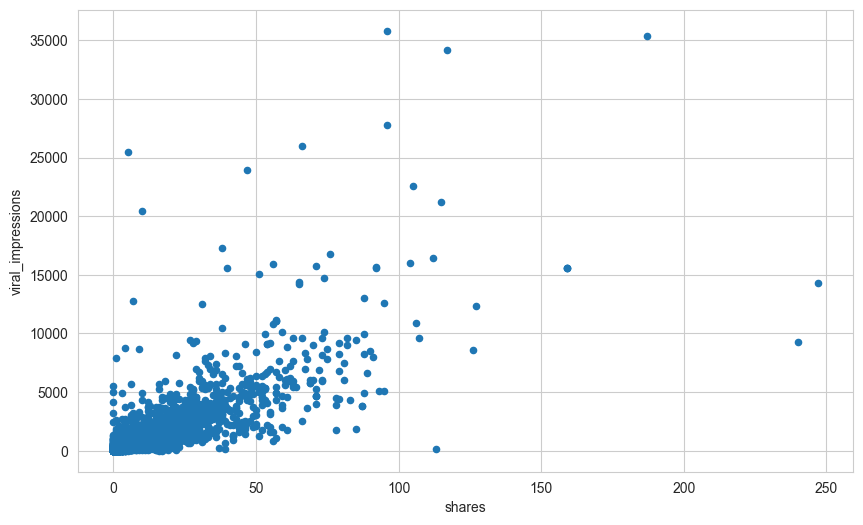

In [334]:
# shares vs viral_impressions
df_fbk_1.plot(x='shares', y='viral_impressions', kind='scatter');

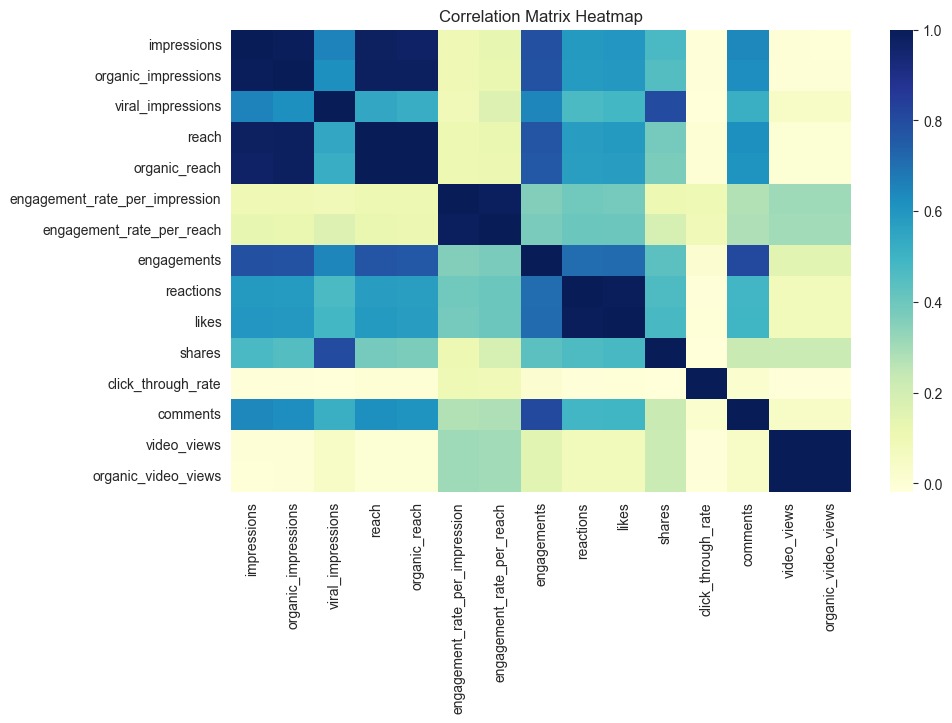

In [335]:
sns.heatmap(fbk_corr, cmap="YlGnBu");
plt.title("Correlation Matrix Heatmap");

In [336]:
# categorical variables
df_fbk_1[string_cols]

,date,network,post_type,content_type,profile,sent_by,link,post,tags
0,2022-12-17 17:08:00,Facebook,Post,Video,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/253788558082460/posts...,"We celebrated recently with Novare, one of our...",CIB Posts
1,2019-05-04 10:01:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/253788558082460/posts...,N5k can get you started today. Call 01 280 126...,none
2,2020-06-02 21:00:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,Still not sure whether to invest in the FGN Bo...,none
3,2022-05-09 10:37:00,Facebook,Post,Photo,Stanbic IBTC,Damilare Oyekanmi,https://www.facebook.com/StanbicIBTC/photos/a....,Let nothing stop you from achieving your goals...,none
4,2021-07-18 10:00:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,"If you were to pick one wish, what would it be...",none
...,...,...,...,...,...,...,...,...,...
9798,2013-02-01 13:24:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/media/set/?set=a.2828...,none,none
9799,2013-01-17 17:08:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,none,none
9800,2013-01-16 16:58:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/StanbicIBTC/photos/a....,none,none
9801,2013-01-16 16:51:00,Facebook,Post,Photo,Stanbic IBTC,admin,https://www.facebook.com/media/set/?set=a.2714...,none,none


In [337]:
df_fbk_1.content_type.value_counts()

content_type
Photo    7162
Video     957
Text      330
Link      178
Name: count, dtype: int64

### Linkedin

In [338]:
deal_missing_values(df_lnkd_1)

In [339]:
df_lnkd_1 = df_lnkd_1.loc[:, subset]

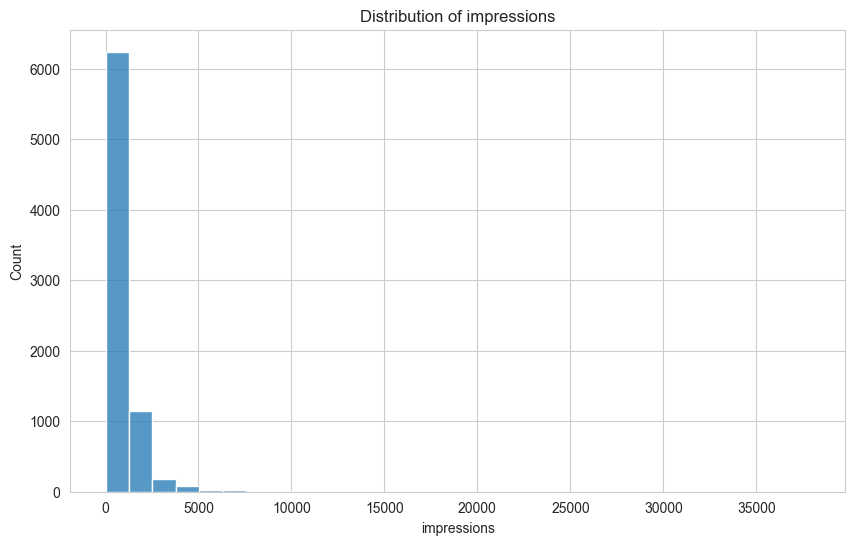

In [340]:
# impressions
sns.histplot(df_lnkd_1.impressions, bins=30);
plt.title('Distribution of impressions');

In [341]:
df_lnkd_1.impressions.describe()

count     7760.000000
mean       883.953479
std       1346.361244
min          0.000000
25%        287.000000
50%        621.000000
75%       1088.250000
max      37889.000000
Name: impressions, dtype: float64

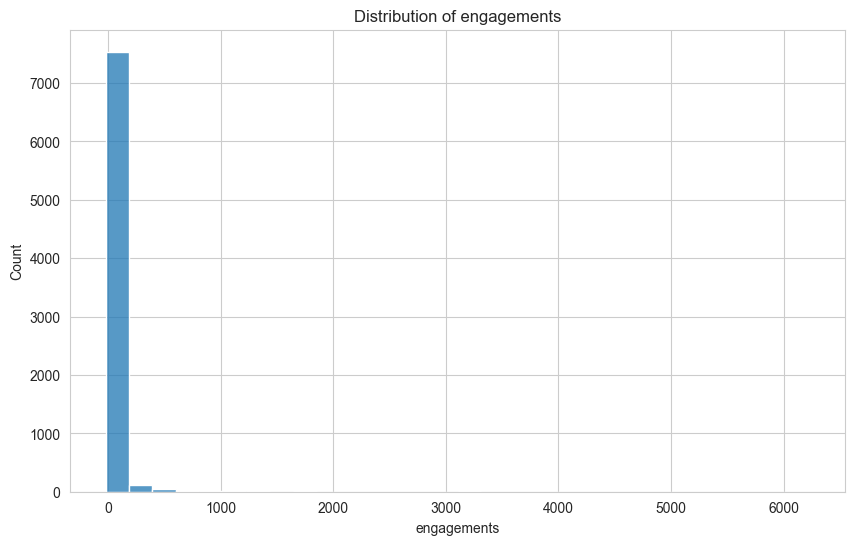

In [342]:
# engagements
sns.histplot(df_lnkd_1.engagements, bins=30);
plt.title('Distribution of engagements');

In [343]:
df_lnkd_1.engagements.describe()

count    7760.000000
mean       41.162500
std       183.177138
min       -23.000000
25%         5.000000
50%        16.000000
75%        31.000000
max      6235.000000
Name: engagements, dtype: float64

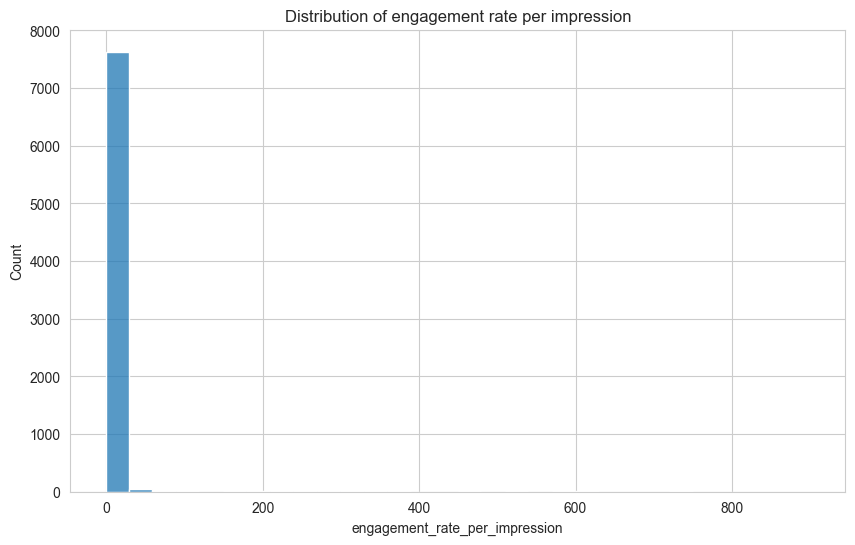

In [344]:
# engagement rate per impression
sns.histplot(df_lnkd_1.engagement_rate_per_impression, bins=30);
plt.title('Distribution of engagement rate per impression');

In [345]:
df_lnkd_1.loc[(df_lnkd_1['engagements'] > df_lnkd_1['impressions'])]

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views,tags
2563,2021-10-26 13:23:00,6858739854432321536,LinkedIn,Post,Video,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:ugcPos...,The Stanbic IBTC Pension Myth Busters Series a...,1.0,1.0,0.0,0.0,0.0,0.0,200.00,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.00,0.0,3.0,3.0,none
6540,2018-03-07 09:44:00,6377071371033341952,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,ICYMI: Pictures from our recently concluded We...,32.0,32.0,0.0,0.0,0.0,0.0,112.50,0.0,36.0,32.0,32.0,0.0,1.0,0.0,9.38,0.0,0.0,0.0,none
6563,2018-02-28 19:31:00,6374682332728741888,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,"(Left - Right)\nYinka Sanni (CE, Stanbic IBTC ...",21.0,21.0,0.0,0.0,0.0,0.0,190.48,0.0,40.0,38.0,38.0,0.0,1.0,0.0,4.76,0.0,0.0,0.0,none
6585,2018-02-27 10:54:00,6374189736675856384,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,On the panel are Temi Giwa founder & CEO Life ...,7.0,7.0,0.0,0.0,0.0,0.0,228.57,0.0,16.0,15.0,15.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,none
6591,2018-02-26 16:02:00,6373904800198774784,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,And @thefisayo is our first #3minAccountChall...,7.0,7.0,0.0,0.0,0.0,0.0,357.14,0.0,25.0,23.0,23.0,0.0,1.0,0.0,0.00,1.0,0.0,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,2018-01-31 15:30:00,6364474716366925824,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,#WealthWednesday We know you love the freedom ...,5.0,5.0,0.0,0.0,0.0,0.0,280.00,0.0,14.0,13.0,13.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,none
6669,2018-01-30 14:00:00,6364089677770747904,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,#JAMBTip Planning your study time and sticking...,3.0,3.0,0.0,0.0,0.0,0.0,700.00,0.0,21.0,20.0,20.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,none
6670,2018-01-30 10:00:00,6364029228677234688,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,#TermOfTheDay\nA Permalink is a web address th...,3.0,3.0,0.0,0.0,0.0,0.0,833.33,0.0,25.0,24.0,24.0,0.0,1.0,0.0,0.00,0.0,0.0,0.0,none
6671,2018-01-29 12:12:00,6363700043815403520,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,Members of Stanbic IBTC Asset Management's Ex...,10.0,10.0,0.0,0.0,0.0,0.0,600.00,0.0,60.0,57.0,57.0,0.0,1.0,0.0,20.00,0.0,0.0,0.0,none


In [346]:
df_lnkd_1 = df_lnkd_1.drop(df_lnkd_1[df_lnkd_1['engagements'] > df_lnkd_1['impressions']].index)

In [347]:
df_lnkd_1 = df_lnkd_1.drop(df_lnkd_1[df_lnkd_1['engagement_rate_per_impression'] < 0].index)

In [348]:
# df_lnkd_1.engagement_rate_per_impression.describe()
df_lnkd_1[df_lnkd_1['engagement_rate_per_impression'] > 98]

,date,post_id,network,post_type,content_type,profile,sent_by,link,post,impressions,organic_impressions,viral_impressions,reach,organic_reach,potential_reach,engagement_rate_per_impression,engagement_rate_per_reach,engagements,reactions,likes,dislikes,shares,saves,click_through_rate,comments,video_views,organic_video_views,tags
6564,2018-02-28 19:24:00,6374680626716569600,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,"The CE, Stanbic IBTC Bank, Dr. Demola Sogunle...",13.0,13.0,0.0,0.0,0.0,0.0,100.0,0.0,13.0,12.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,none
6578,2018-02-28 11:24:00,6374559615841071104,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,Social media has been able to cut a lot of cos...,11.0,11.0,0.0,0.0,0.0,0.0,100.0,0.0,11.0,9.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,none
6590,2018-02-27 09:47:00,6374172981068910592,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,"Day 2, live from\n #SMWLagos. Stop by our boot...",15.0,15.0,0.0,0.0,0.0,0.0,100.0,0.0,15.0,14.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,none
6593,2018-02-26 14:33:00,6373882453026750464,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,"During a panel discussion titled ""How to effec...",8.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,8.0,7.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,none
6598,2018-02-24 14:00:00,6373149351253987328,LinkedIn,Post,Photo,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,"#ThanksToSocialMedia, you can start your caree...",7.0,7.0,0.0,0.0,0.0,0.0,100.0,0.0,7.0,6.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,none
6603,2018-02-23 13:00:00,6372771852451934208,LinkedIn,Post,Link,Stanbic IBTC,admin,https://linkedin.com/feed/update/urn:li:activi...,#HappenToLife\nJoin over 1.4 million forward-l...,13.0,13.0,0.0,0.0,0.0,0.0,100.0,0.0,13.0,11.0,11.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,none


In [349]:
# correlation between numeric features
lnkd_corr = df_lnkd_1[numeric_cols].drop(['engagement_rate_per_reach','saves','organic_reach','reach', 'potential_reach', 'viral_impressions', 'dislikes'], axis = 1).corr()

In [350]:
lnkd_corr

,impressions,organic_impressions,engagement_rate_per_impression,engagements,reactions,likes,shares,click_through_rate,comments,video_views,organic_video_views
impressions,1.000000,1.000000,0.179472,0.675998,0.799456,0.799456,0.463009,0.444507,0.358631,0.190548,0.190548
organic_impressions,1.000000,1.000000,0.179472,0.675998,0.799456,0.799456,0.463009,0.444507,0.358631,0.190548,0.190548
engagement_rate_per_impression,0.179472,0.179472,1.000000,0.329110,0.247351,0.247351,0.141445,0.431770,0.088774,0.018371,0.018371
engagements,0.675998,0.675998,0.329110,1.000000,0.631591,0.631591,0.241261,0.746086,0.230481,0.062967,0.062967
reactions,0.799456,0.799456,0.247351,0.631591,1.000000,1.000000,0.383581,0.344920,0.368209,0.204351,0.204351
likes,0.799456,0.799456,0.247351,0.631591,1.000000,1.000000,0.383581,0.344920,0.368209,0.204351,0.204351
shares,0.463009,0.463009,0.141445,0.241261,0.383581,0.383581,1.000000,0.191898,0.139834,0.087375,0.087375
click_through_rate,0.444507,0.444507,0.431770,0.746086,0.344920,0.344920,0.191898,1.000000,0.090424,-0.003521,-0.003521
comments,0.358631,0.358631,0.088774,0.230481,0.368209,0.368209,0.139834,0.090424,1.000000,0.260738,0.260738
video_views,0.190548,0.190548,0.018371,0.062967,0.204351,0.204351,0.087375,-0.003521,0.260738,1.000000,1.000000


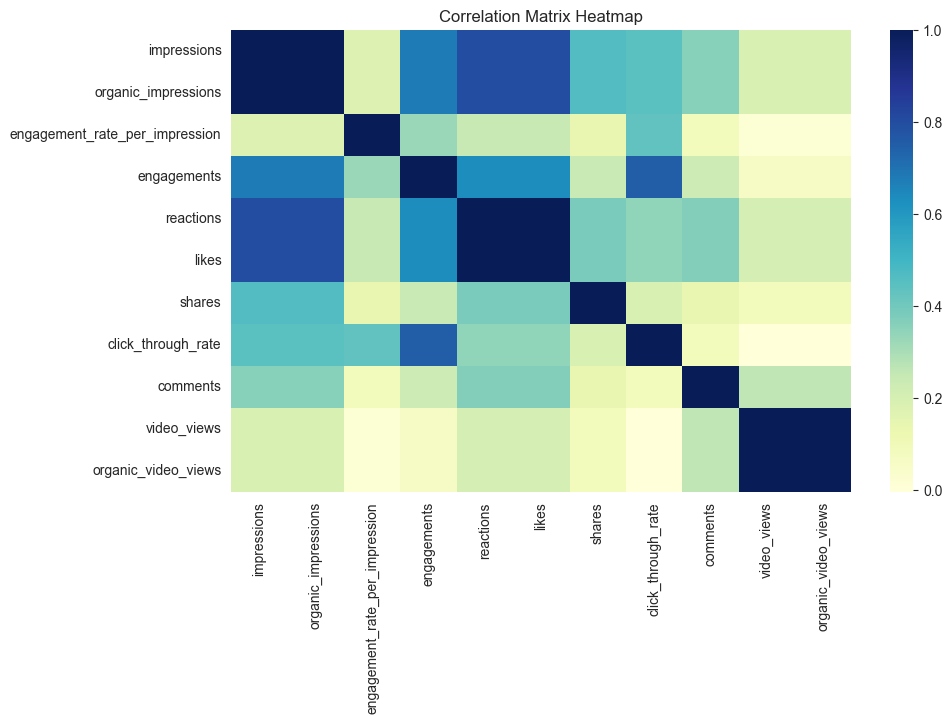

In [351]:
sns.heatmap(lnkd_corr, cmap="YlGnBu");
plt.title("Correlation Matrix Heatmap");

## Extracting insights

In [353]:
# Concatenate all dataframes
df_socials = pd.concat([df_insta_1, df_lnkd_1, df_twit_1, df_fbk_1])
transform_data(df_socials)

### What is the overall trend in impressions and engagements over time?

In [354]:
# Total impressions per year per network
# df_socials['half_year'] = df_socials['date'].dt.month 
impressions_trend = df_socials.groupby(['year', 'network'])[['impressions']].sum().reset_index()

In [462]:
df_socials_1 = df_socials.copy()

In [467]:
# df_socials_1['month'] = df_socials_1['date'].dt.month

# # Filter the data to only include rows where the month is less than or equal to 6
# df_filtered_socials = df_socials_1[df_socials_1['month'] <= 6]
# impressions_trend_6 = df_filtered_socials.groupby(['year', 'network'])[['impressions']].sum().reset_index()

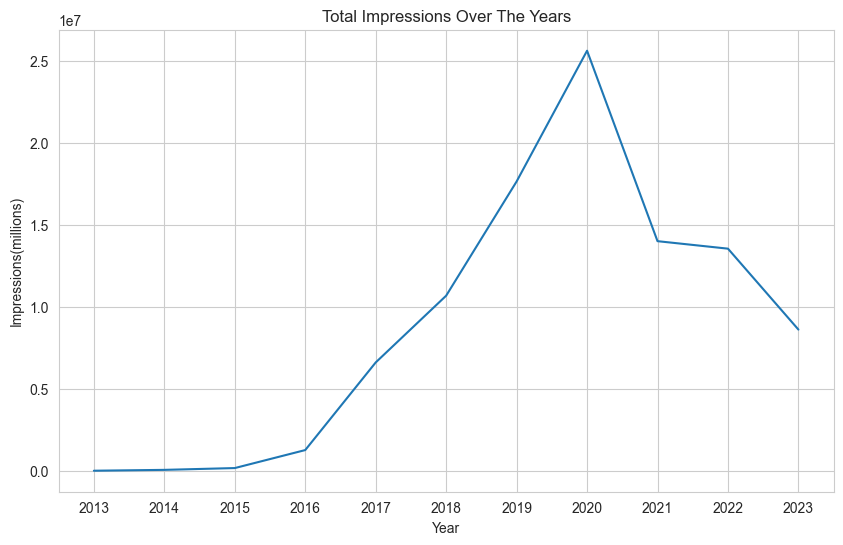

In [494]:
# Total impressions per year across all networks
total_impressions = impressions_trend.groupby('year')['impressions'].sum().reset_index()

# Create a line plot using Seaborn
sns.lineplot(data=total_impressions, x='year', y='impressions')

# Customize the plot
plt.title('Total Impressions Over The Years')
plt.xlabel('Year')
plt.ylabel('Impressions(millions)')
plt.xticks(impressions_trend['year'].unique())

# Display the plot
plt.show()
# plt.savefig('impressions-over-the-years.jpeg')

In [495]:
yoy_change_i = total_impressions['impressions'].pct_change(periods=1) * 100


In [491]:
yoy_change_e = total_engagements[['engagements']].pct_change(periods=1) * 100


In [496]:
total_impressions

,year,impressions
0,2013,0.0
1,2014,52085.0
2,2015,162069.0
3,2016,1260073.0
4,2017,6605629.0
5,2018,10678707.0
6,2019,17646694.0
7,2020,25625015.0
8,2021,14005501.0
9,2022,13548329.0


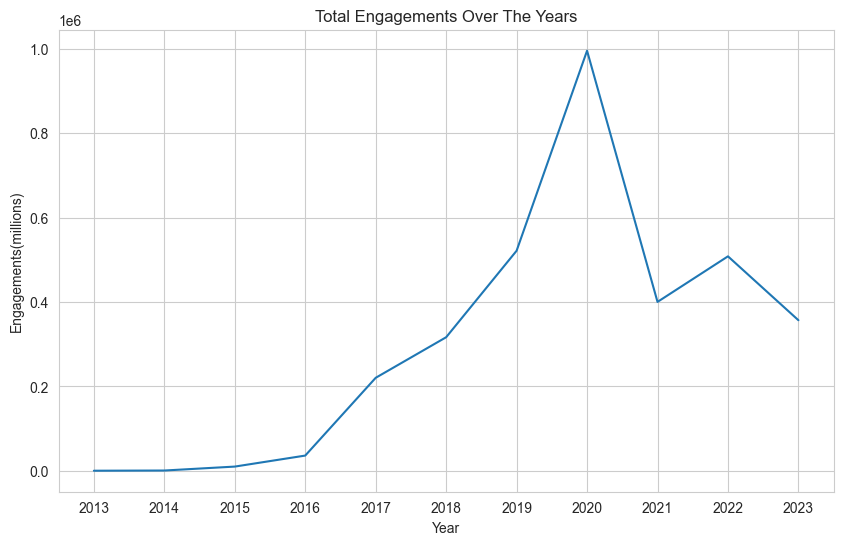

In [484]:
# Total engagements per year per network
engagements_trend = df_socials.groupby(['year', 'network'])[['engagements']].sum().reset_index()
total_engagements = engagements_trend.groupby('year')['engagements'].sum().reset_index()

sns.lineplot(data=total_engagements, x='year', y='engagements')

# Customize the plot
plt.title('Total Engagements Over The Years')
plt.xlabel('Year')
plt.ylabel('Engagements(millions)')
plt.xticks(impressions_trend['year'].unique())

# Display the plot
plt.show()

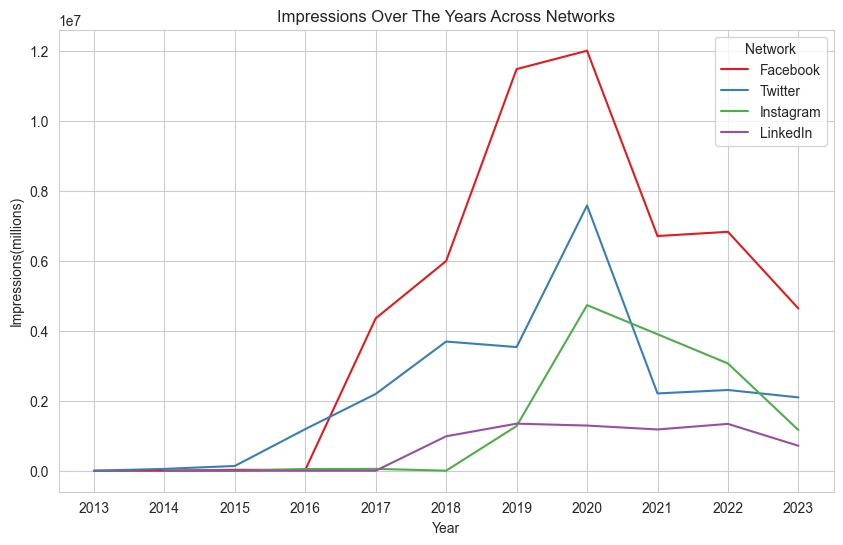

In [359]:
# impressions over the years across all networks 

sns.lineplot(data=impressions_trend, x='year', y='impressions', hue='network', palette='Set1')

# Customize plot
plt.title('Impressions Over The Years Across Networks')
plt.xlabel('Year')
plt.ylabel('Impressions(millions)')
plt.xticks(impressions_trend['year'].unique())
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

# Display the legend
plt.legend(title='Network')

# Display the plot
plt.show()


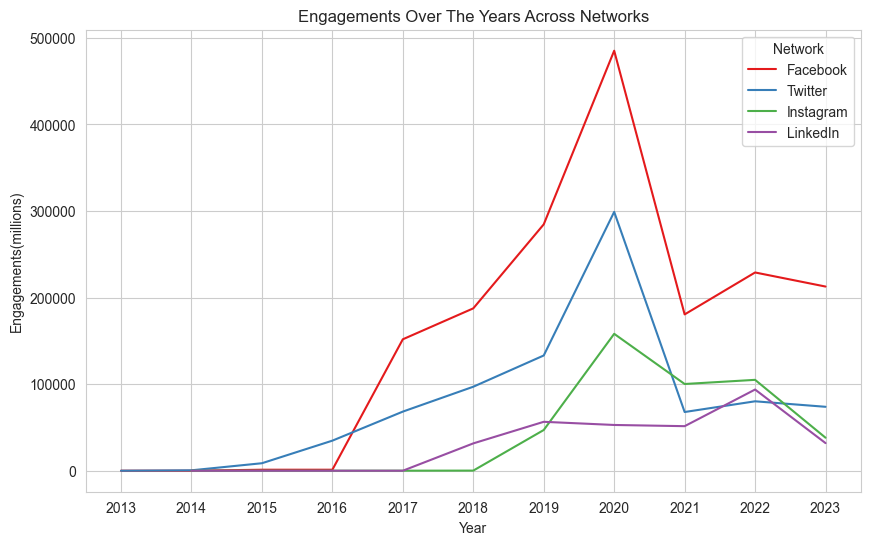

In [362]:
# engagements over the years across all networks
sns.lineplot(data=engagements_trend, x='year', y='engagements', hue='network', palette='Set1')

# Customize plot
plt.title('Engagements Over The Years Across Networks')
plt.xlabel('Year')
plt.ylabel('Engagements(millions)')
plt.xticks(impressions_trend['year'].unique())
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

# Display the legend
plt.legend(title='Network')

# Display the plot
plt.show()

In [ ]:
# quantity of posts over time
post_quantity = df_socials.groupby(['year'])[['post']].count().reset_index()
sns.barplot(x='year', y='post', data=post_quantity, orient='v')

Impressions and engagements reached an all time high in 2020 for all social networks but declined rather sharply since then. What could be causing this decline? This sharp  decline in impressions and engagements may be attributed to changes in the algorithms of social networks. However, the quality of content may have reduced as well over the years.

### Which content types have the highest engagements, average engagement rate per reach and avergae engagement rate per impression?

#### instagram

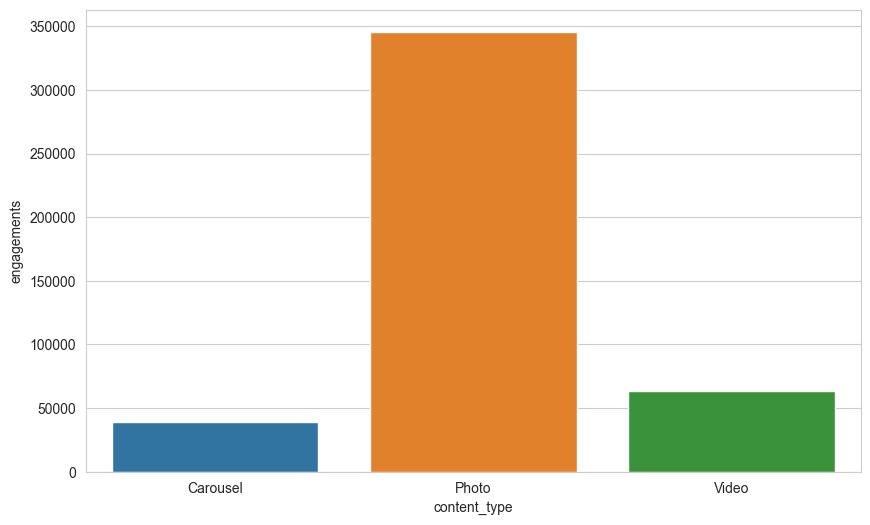

In [373]:
content_engagement_insta = df_insta_1.groupby(['content_type'])[['engagements']].sum().reset_index()
sns.barplot(x='content_type', y='engagements', data=content_engagement_insta, orient='v');

The number of engagements is much higher for photos and that is because more than 80% of the client's posts on instagram are photos so this is expected.

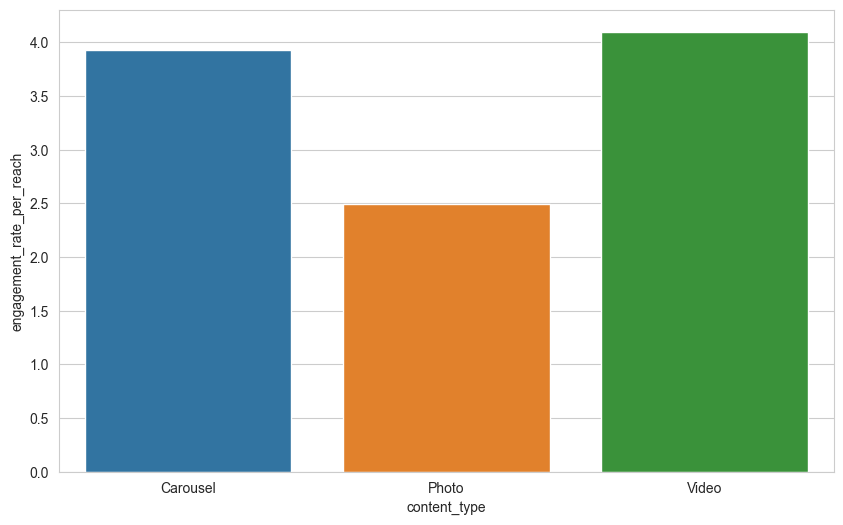

In [375]:
content_engagement_reach_insta = df_insta_1.groupby(['content_type'])[['engagement_rate_per_reach']].mean().reset_index()
sns.barplot(x='content_type', y='engagement_rate_per_reach', data=content_engagement_reach_insta, orient='v');

This plot tells a much different story, though most of the client's post are photos, more people engage with videos. So on average 4% of the people(unique) who see a video once engage with. So videos are the client's most engaging content on Instagram 

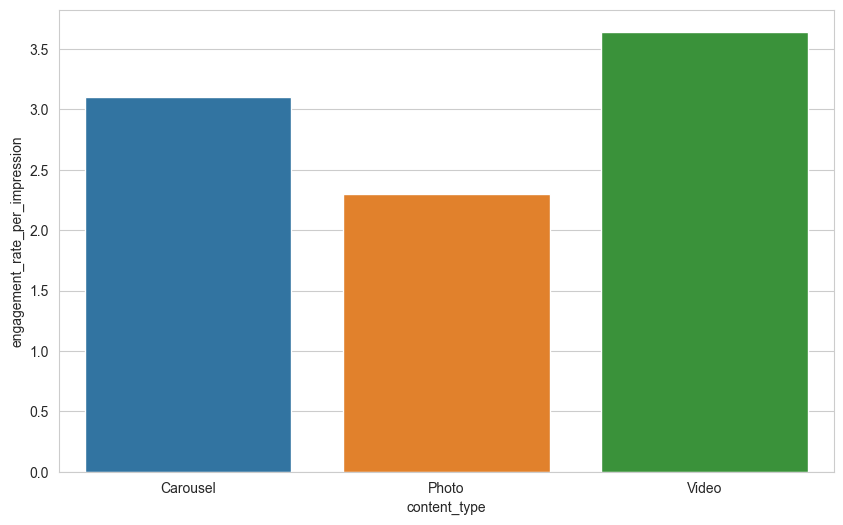

In [370]:
content_engagement_impression_insta = df_insta_1.groupby(['content_type'])[['engagement_rate_per_impression']].mean().reset_index()
sns.barplot(x='content_type', y='engagement_rate_per_impression', data=content_engagement_impression_insta, orient='v');

#### Linkedin

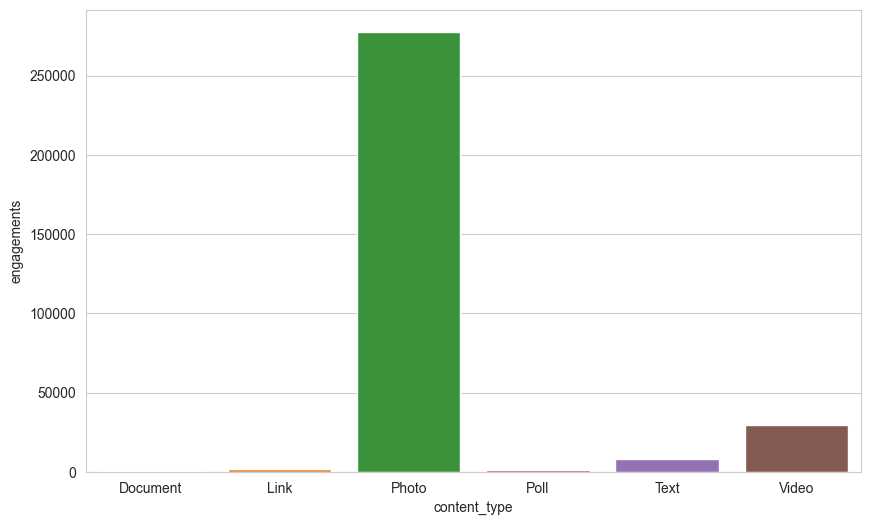

In [376]:
content_engagement_lnkd = df_lnkd_1.groupby(['content_type'])[['engagements']].sum().reset_index()
sns.barplot(x='content_type', y='engagements', data=content_engagement_lnkd, orient='v');

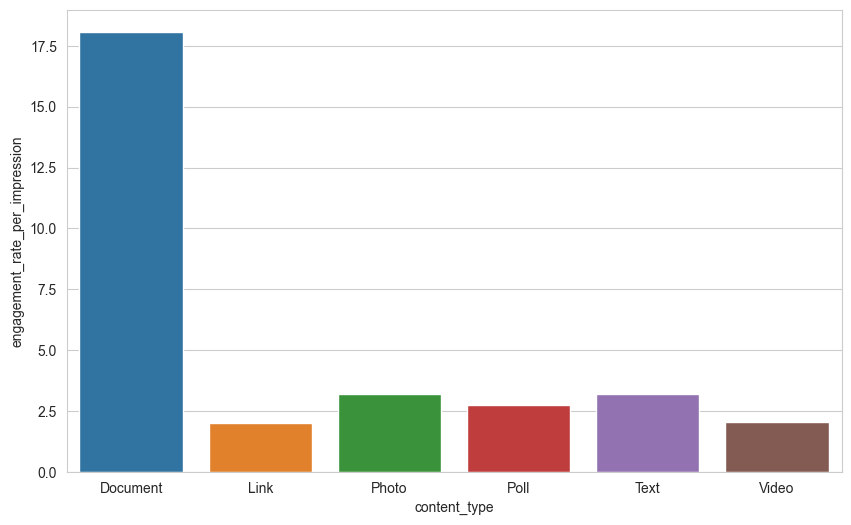

In [382]:
content_engagement_impression_lnkd = df_lnkd_1.groupby(['content_type'])[['engagement_rate_per_impression']].mean().reset_index()
sns.barplot(x='content_type', y='engagement_rate_per_impression', data=content_engagement_impression_lnkd, orient='v');

Documents appear to be the content the audience on linkedin enjoys. This doesnt tell the whole story, there is only one post containing a document, hence the reason it is so high,photos and text appear to be the more successful content types on linkedin.

#### Twitter

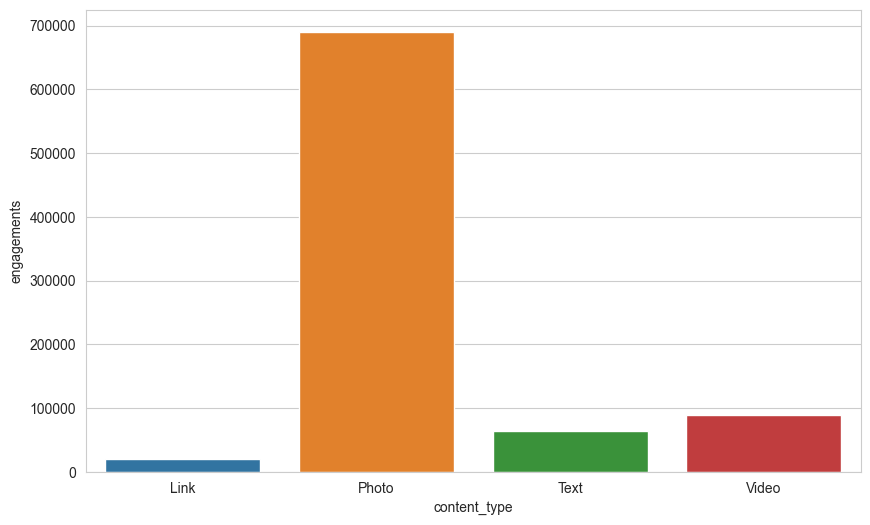

In [383]:
content_engagement_twit = df_twit_1.groupby(['content_type'])[['engagements']].sum().reset_index()
sns.barplot(x='content_type', y='engagements', data=content_engagement_twit, orient='v');

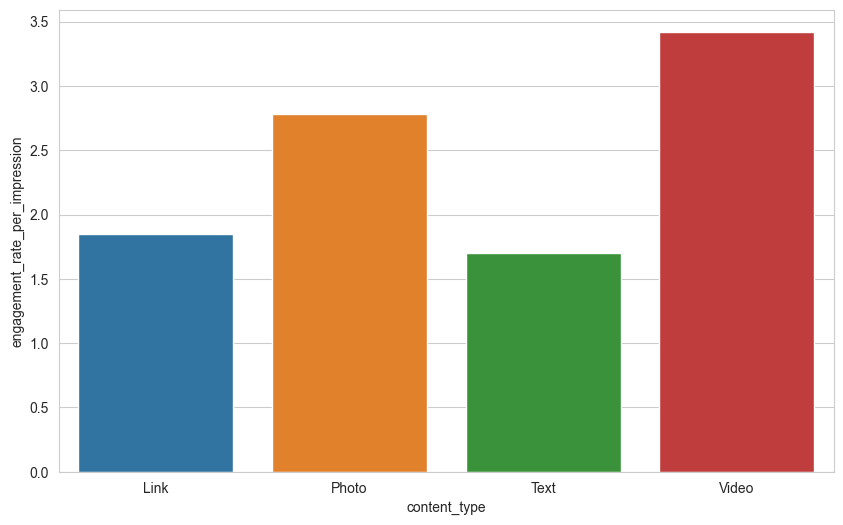

In [385]:
content_engagement_impression_twit = df_twit_1.groupby(['content_type'])[['engagement_rate_per_impression']].mean().reset_index()
sns.barplot(x='content_type', y='engagement_rate_per_impression', data=content_engagement_impression_twit, orient='v');

For twitter videos and photo containing tweets are most engaged with. Tweets with no videos or photos do not attract as much engagement.

#### Facebook

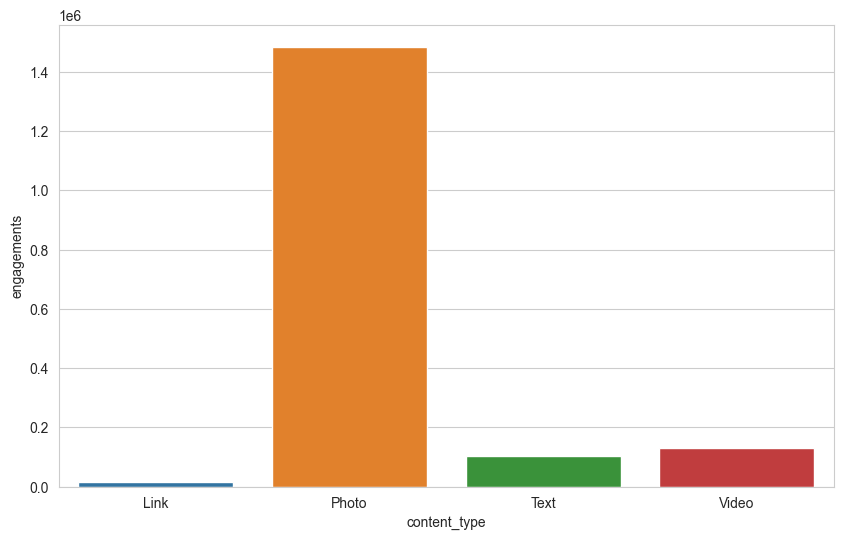

In [386]:
content_engagement_fbk = df_fbk_1.groupby(['content_type'])[['engagements']].sum().reset_index()
sns.barplot(x='content_type', y='engagements', data=content_engagement_fbk, orient='v');

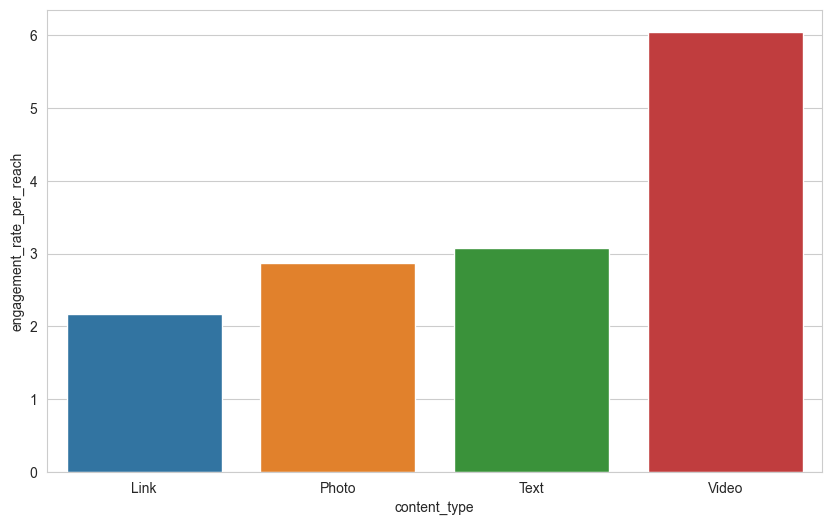

In [387]:
content_engagement_reach_fbk = df_fbk_1.groupby(['content_type'])[['engagement_rate_per_reach']].mean().reset_index()
sns.barplot(x='content_type', y='engagement_rate_per_reach', data=content_engagement_reach_fbk, orient='v');

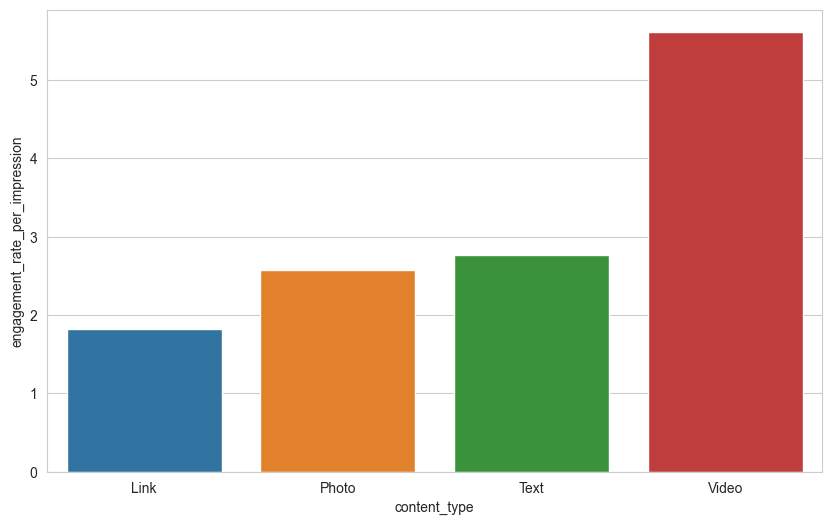

In [388]:
content_engagement_impression_fbk = df_fbk_1.groupby(['content_type'])[['engagement_rate_per_impression']].mean().reset_index()
sns.barplot(x='content_type', y='engagement_rate_per_impression', data=content_engagement_impression_fbk, orient='v');

### Which network generates the most engagement?

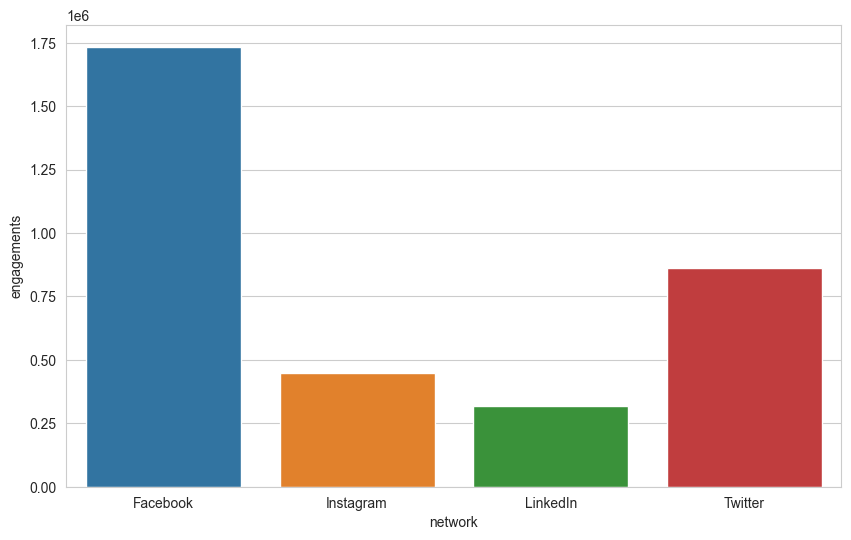

In [389]:
content_engagement_all = df_socials.groupby(['network'])[['engagements']].sum().reset_index()
sns.barplot(x='network', y='engagements', data=content_engagement_all, orient='v');

In [397]:
df_socials.engagement_rate_per_impression.mean()

2.7775836752321315

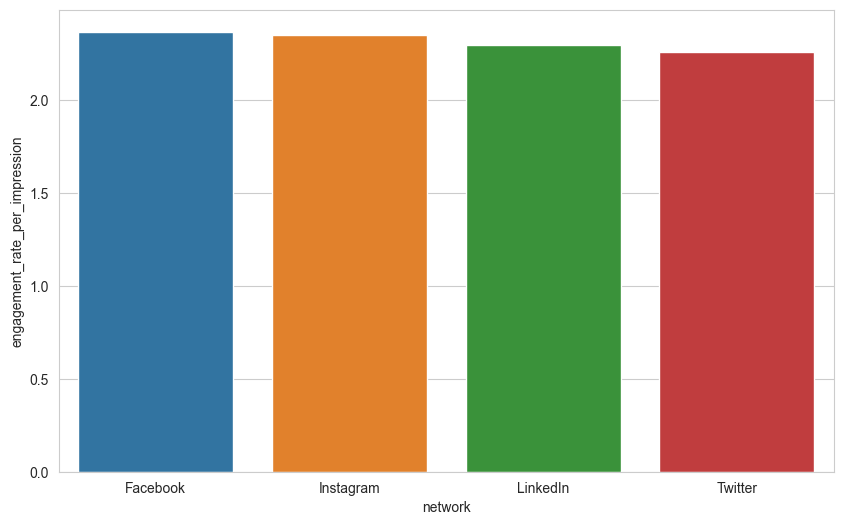

In [394]:
#  enagement rate across networks
content_engagement_rate_all = df_socials.groupby(['network'])[['engagement_rate_per_impression']].median().reset_index()
sns.barplot(x='network', y='engagement_rate_per_impression', data=content_engagement_rate_all, orient='v');

### Is there a relationship between post length and engagement? and how does it vary?

In [405]:
# Across all social networks
df_socials[['post_length', 'engagements']].corr()

,post_length,engagements
post_length,1.000000,-0.027803
engagements,-0.027803,1.000000


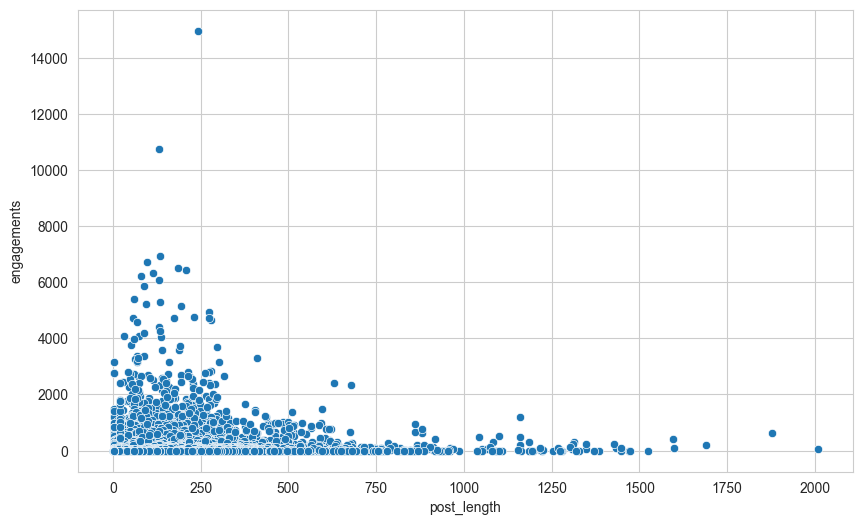

In [407]:
sns.scatterplot(x=df_socials.post_length, y=df_socials.engagements);

There is no correlation between post lentgth and engagements

### What are the peak times for user engagement?

In [428]:
df_socials['day'] = df_socials['date'].apply(lambda x: x.day_name())
df_socials['day'] = pd.Categorical(df_socials['day'], categories=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], ordered=True)
counts = df_socials.day.value_counts(sort=False)

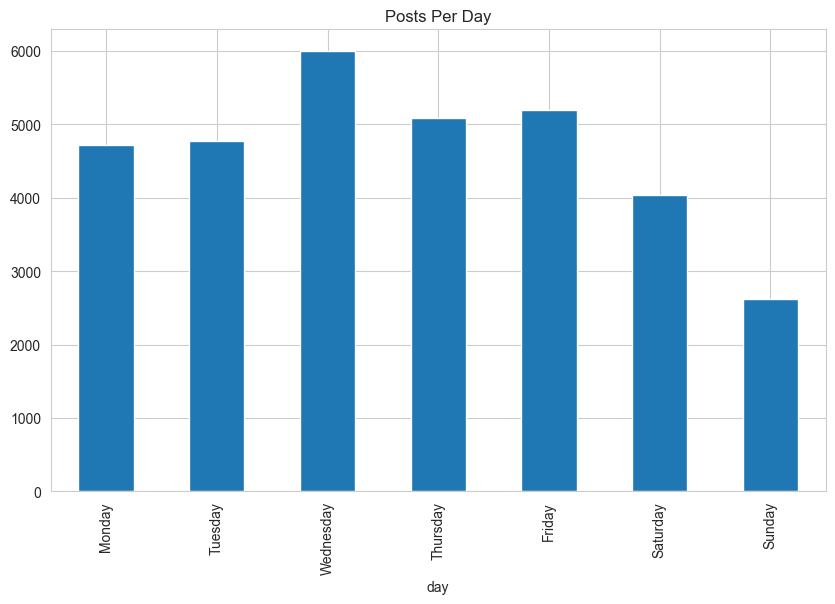

In [430]:
# Number of posts put out per weekday
counts.plot(kind='bar')
plt.title('Posts Per Day')
plt.show()

Wednesday and Friday are the days when most content has been put out ever

Text(0, 0.5, 'Average Engagement rate per impression')

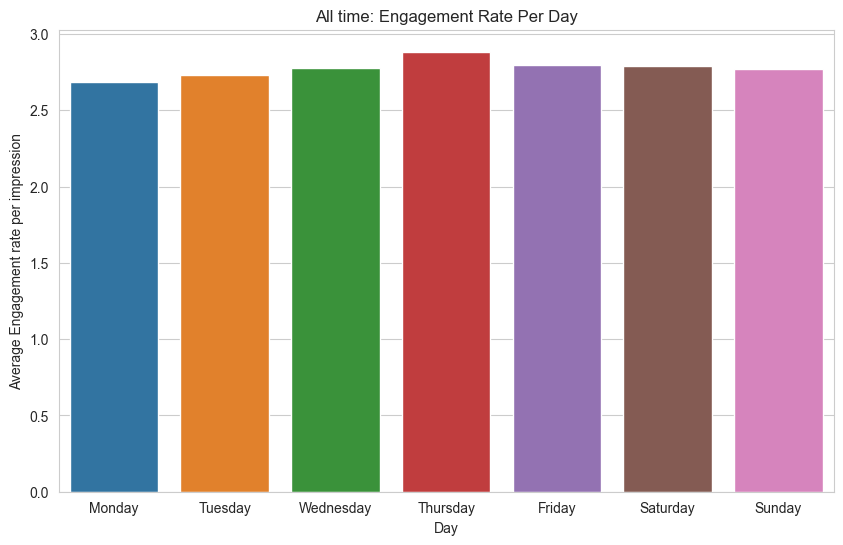

In [551]:
counts_engagement_rate = df_socials.groupby('day')[['engagement_rate_per_impression']].mean().reset_index()
sns.barplot(x='day', y='engagement_rate_per_impression', data=counts_engagement_rate);
plt.title('All time: Engagement Rate Per Day');
plt.xlabel('Day');
plt.ylabel('Average Engagement rate per impression');

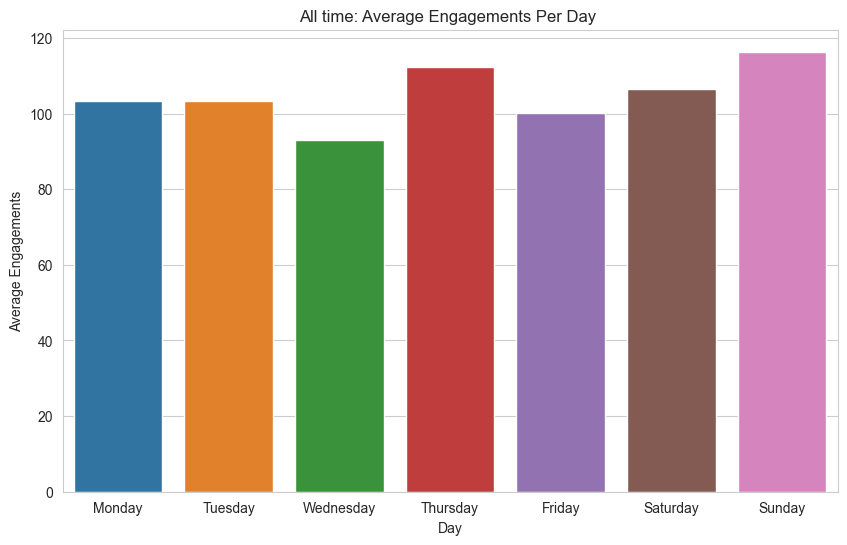

In [552]:
counts_engagements = df_socials.groupby('day')[['engagements']].mean().reset_index()
sns.barplot(x='day', y='engagements', data=counts_engagements);
plt.title('All time: Average Engagements Per Day ');
plt.xlabel('Day');
plt.ylabel('Average Engagements');

In [435]:
# make time of day continuous
df_socials['time_of_day'] = df_socials['date'].apply(lambda x: x.hour + x.minute/60
+ x.second/3600)

df_socials['hour'] = df_socials['date'].apply(lambda x: x.hour)

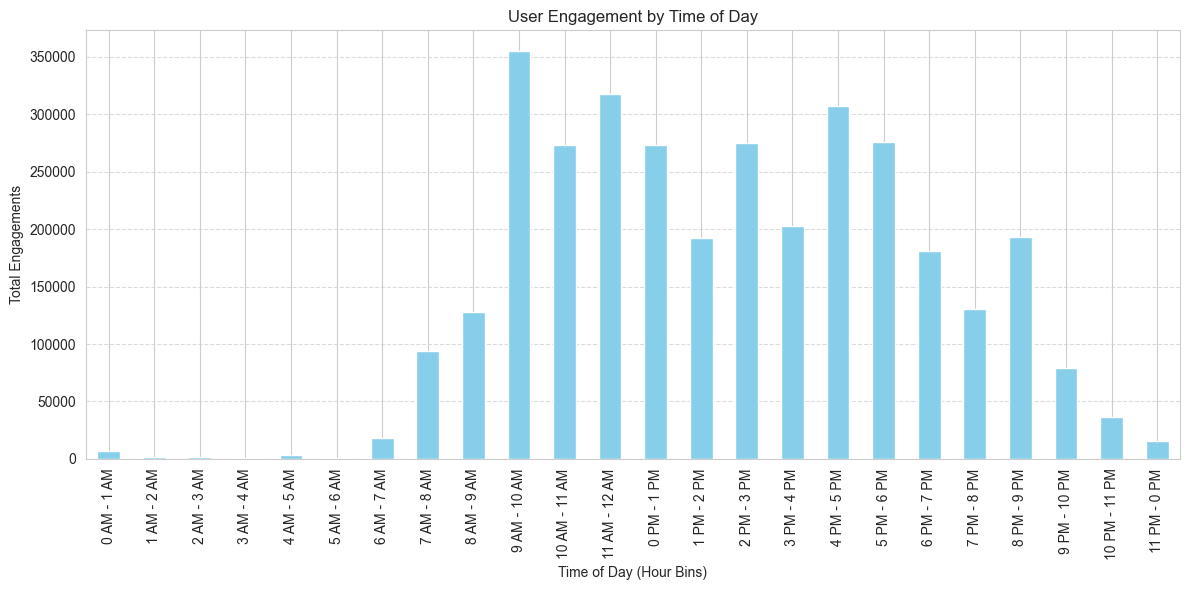

In [451]:
bin_size = 1  # 1 hour intervals
time_bins = range(0, 24 + bin_size, bin_size)  # Create time bins from 0 to 24

# Bin the 'time_of_day' data
bin_labels = [f'{i % 24} AM - {(i + 1) % 24} AM' if i < 12 else f'{i % 12} PM - {(i + 1) % 12} PM' for i in time_bins[:-1]]
df_socials['time_bin'] = pd.cut(df_socials['time_of_day'], bins=time_bins, labels=bin_labels, include_lowest=True)

# Group by time bins and calculate total engagements in each bin
engagement_by_time = df_socials.groupby('time_bin')['engagements'].sum()



# Plot the histogram
plt.figure(figsize=(12, 6))
engagement_by_time.plot(kind='bar', color='skyblue')
plt.title('User Engagement by Time of Day')
plt.xlabel('Time of Day (Hour Bins)')
plt.ylabel('Total Engagements')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

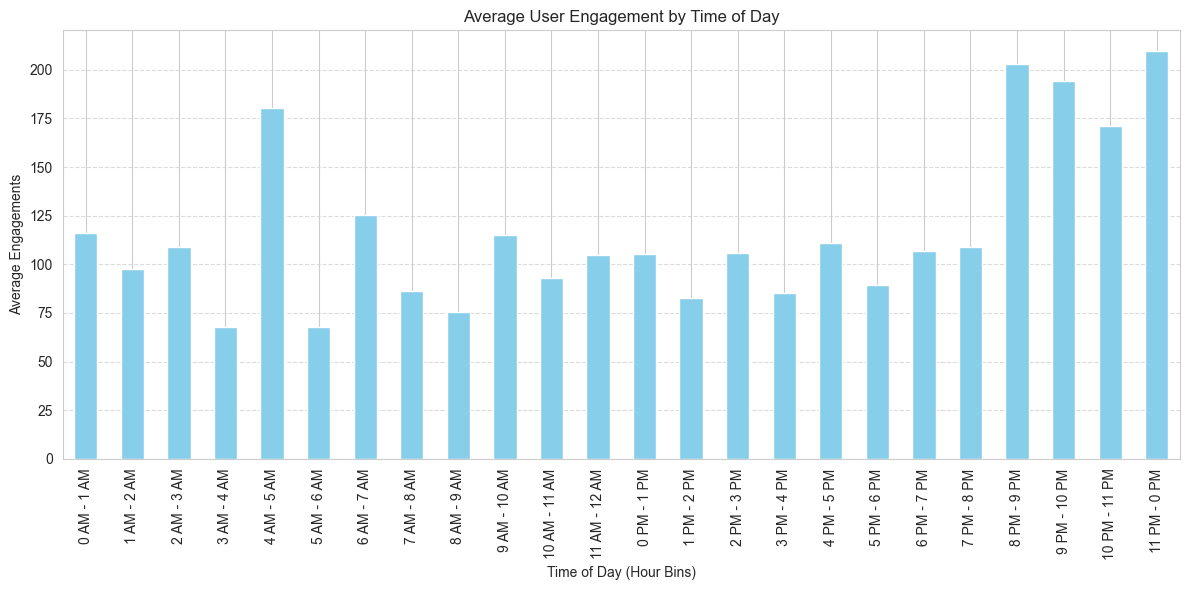

In [437]:
# bin_size = 1  # 1 hour intervals
# time_bins = range(0, 24 + bin_size, bin_size)  # Create time bins from 0 to 24

# # Bin the 'time_of_day' data
# bin_labels = [f'{i % 24} AM - {(i + 1) % 24} AM' if i < 12 else f'{i % 12} PM - {(i + 1) % 12} PM' for i in time_bins[:-1]]
# df_socials['time_bin'] = pd.cut(df_socials['time_of_day'], bins=time_bins, labels=bin_labels, include_lowest=True)

# Group by time bins and calculate total engagements in each bin
engagement_by_time_1 = df_socials.groupby('time_bin')['engagements'].mean()

# Plot the histogram
plt.figure(figsize=(12, 6))
engagement_by_time_1.plot(kind='bar', color='skyblue')
plt.title('Average User Engagement by Time of Day')
plt.xlabel('Time of Day (Hour Bins)')
plt.ylabel('Average Engagements')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [461]:
df_socials.content_type.value_counts(normalize=True)

content_type
Photo       0.804146
Video       0.110960
Text        0.048771
Link        0.021655
Carousel    0.014375
Poll        0.000062
Document    0.000031
Name: proportion, dtype: float64

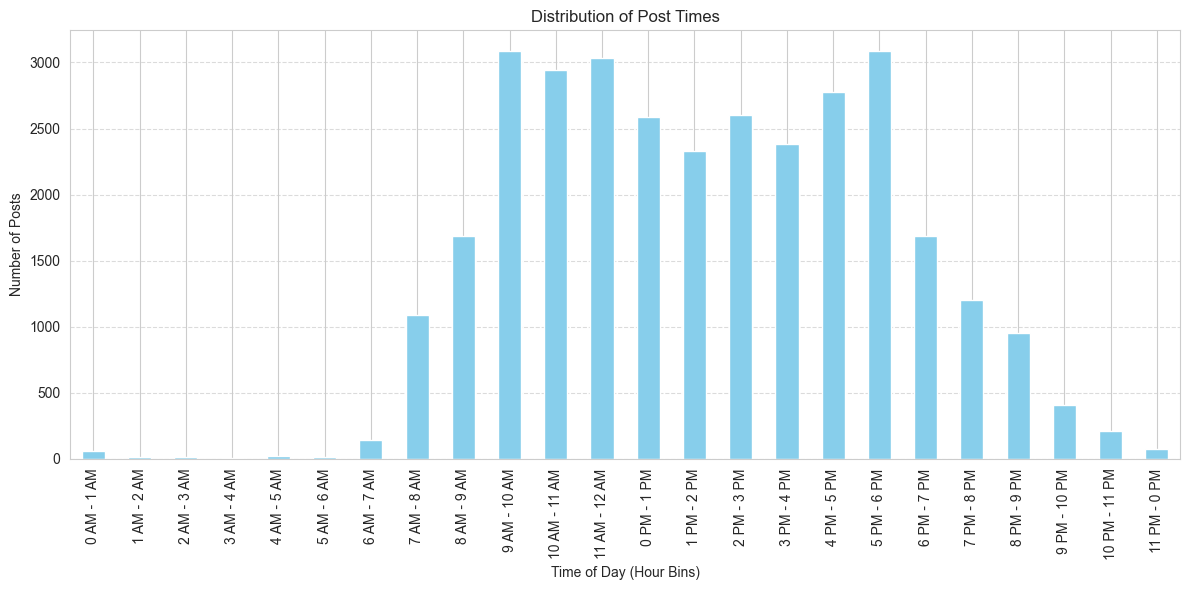

In [438]:
post_count_by_time = df_socials.groupby('time_bin').size()

# Plot the histogram or bar plot for post times
plt.figure(figsize=(12, 6))
post_count_by_time.plot(kind='bar', color='skyblue')
plt.title('Distribution of Post Times')
plt.xlabel('Time of Day (Hour Bins)')
plt.ylabel('Number of Posts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

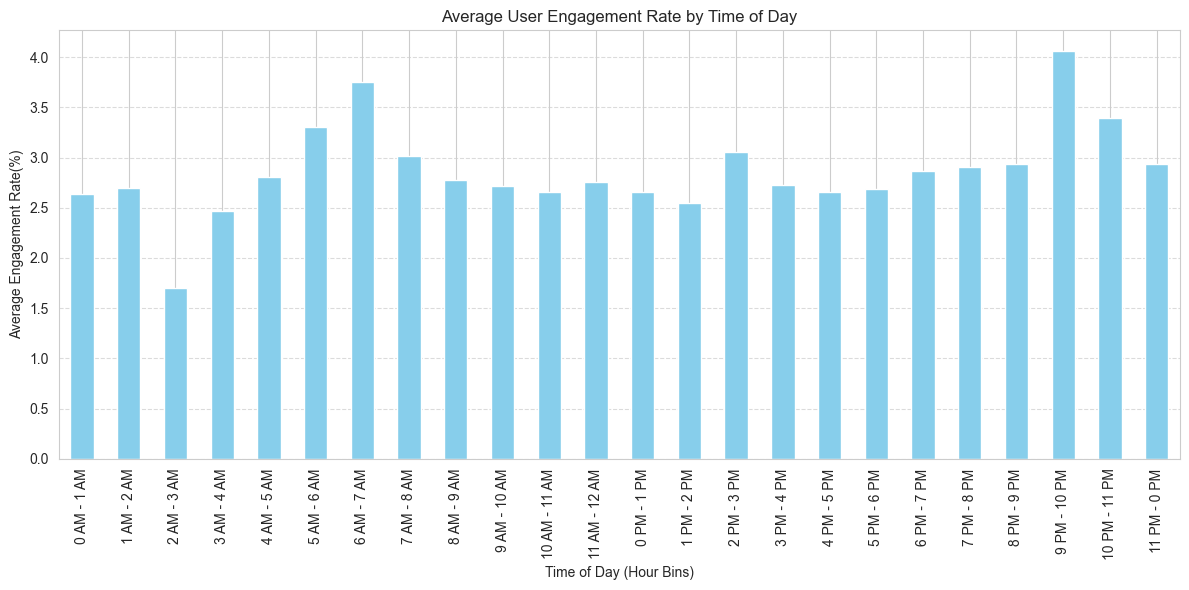

In [447]:
engagement_rate_by_time_1 = df_socials.groupby('time_bin')['engagement_rate_per_impression'].mean()

# Plot the histogram
plt.figure(figsize=(12, 6))
engagement_rate_by_time_1.plot(kind='bar', color='skyblue')
plt.title('Average User Engagement Rate by Time of Day')
plt.xlabel('Time of Day (Hour Bins)')
plt.ylabel('Average Engagement Rate(%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [549]:
df_socials.network.value_counts()

network
Facebook     8627
Twitter      8529
LinkedIn     7692
Instagram    7569
Name: count, dtype: int64

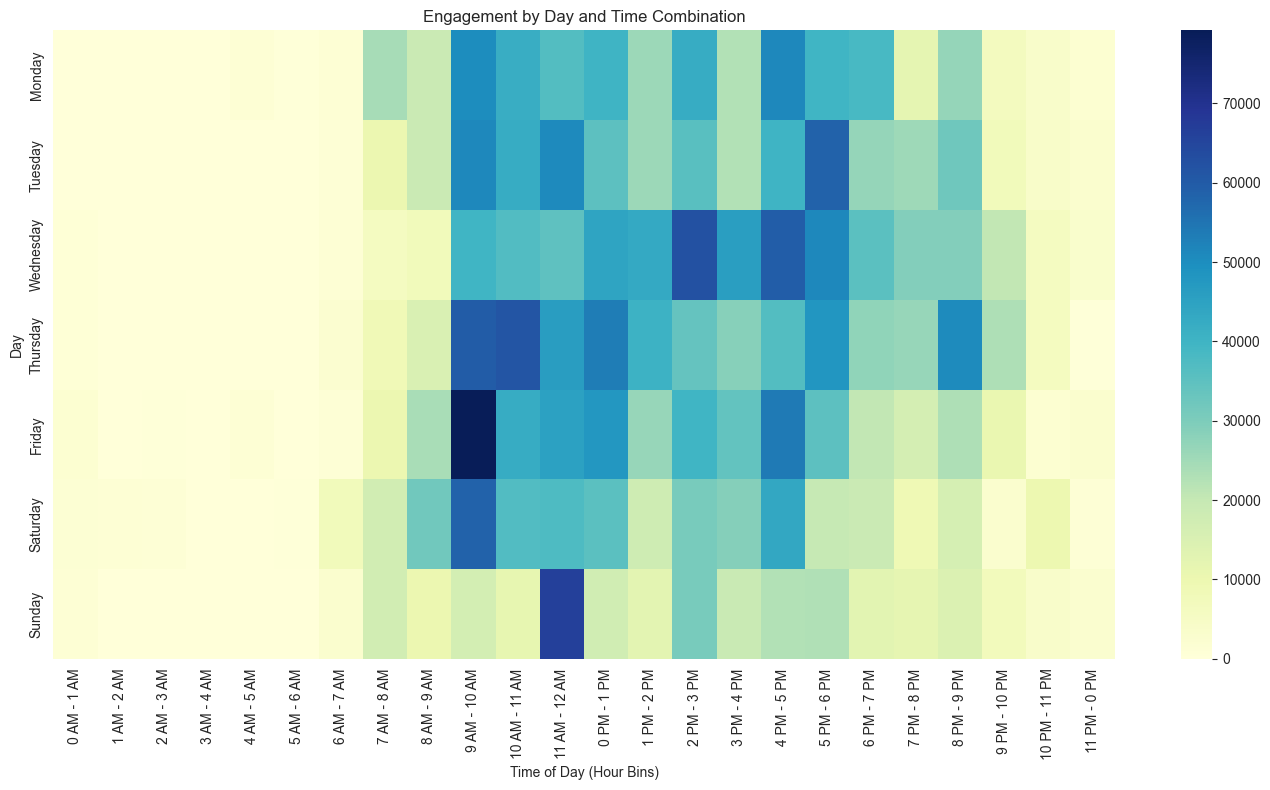

In [541]:
engagement_by_day_time = df_socials.groupby(['day', 'time_bin'])['engagements'].sum().unstack(fill_value=0)

# Create a heatmap to visualize the engagement by day and time
plt.figure(figsize=(14, 8))
sns.heatmap(engagement_by_day_time, cmap="YlGnBu")
# engagement_by_day_time.plot(kind='bar')
plt.title('Engagement by Day and Time Combination')
plt.xlabel('Time of Day (Hour Bins)')
plt.ylabel('Day')
plt.tight_layout()
plt.show()

In [ ]:
#### Top Performing Posts